# Titanic Prediction Model
## Kaggle:  "Titanic - Machine Learning from Disaster"

This is the first independent learning exercise being conducted, and where better place to start than with the Kaggle Titanic classification competition?

A series of data are provided for a certain number of passengers on the Titanic with various characteristics of each passenger, along with their outcomes (survived, or did not survive). This data is to be used to create a classification model that will predict the outcome of the remaining passengers based on their characteristics.

Link to the project and data:  https://www.kaggle.com/c/titanic/data?select=train.csv

# Contents - General Outline:
* Loading Packages and Data
* Exploratory Data Analysis (EDA)
* Feature Engineering
* Modeling:
    * Initial Modeling with Logistic Regression Model
    * Additional Feature Engineering and Modifications to Input Model Data
    * Logistic Regression Model Iterations:
        * Default Model Parameters
        * Coarse Parameter Optimization
        * Fine Tuning
        * Final Model Run
    * K-Neighbors (KNN) Model Iterations:
        * Default Model Parameters
        * Coarse Parameter Optimization
        * Fine Tuning
        * Final Model Run
    * Decision Tree Model Iterations:
        * Default Model Parameters
        * Coarse Parameter Optimization
        * Fine Tuning
        * Final Model Run
    * Random Forrest Classifier Model Iterations:
        * Default Model Parameters
        * Coarse Parameter Optimization
        * Coarse Parameter Optimization, Round 2
        * Fine Tuning
        * Final Model Run
    * Attempting Different Input Data Sets on Some Models Previously Run, Analyzing Results
* Aggregate Model Creation
* Model Comparison and Selection
    * Running Model on Test Data, and Generating Results for Submission
* Post-Submission Model Examination
* Conclusions and Next Steps / Model Refinements
* Sources
* APPENDIX

# 0 - Initialization, Loading Toolkits and Data

In [1]:
#Loading Toolkits for Analysis

#Basic Toolkits:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Basic Stats Kit:
from scipy.stats import binom

#Saling Data for KNN
from sklearn.preprocessing import StandardScaler

#Functions for Optimization 
from sklearn.model_selection import GridSearchCV

#Train/Test Split Functions
from sklearn.model_selection import ShuffleSplit

#Model Toolkits to Fit and Predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation - Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import training data set
datatrn = pd.read_csv("train.csv") 

# 1 - Exploratory Data Analysis

In [3]:
#Running Basic Info.
datatrn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


View data in table form to start to investigate null or missing values

In [4]:
#View the data
datatrn

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1.1 - Sort out NaN values
The content of this section was moved to the appendix and was focused on proving that "null" values in the data set were in-fact NaN and not some other type of missing or corrupted data.

## 1.2 - Check Data Types and Rationalize missing values

Verify that the data types are what would be expected (like Age is a number type and not an object).
Also investigate why values are missing.

In [5]:
datatrn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Type Observations:
*PassengerID, Survided, Pclass are all expected to be numbers per the description of the data provided from Kaggle
*Name, Sex, Ticket, Cabin, Embarked are all expected to be objects as they are alpha/numeric data types
*Age is a float because they employ decimals to indicate that the age is estimated or that the person is less than one year old
*SibSp, Parch are both expected to be integers per the data description provided

### Data Type Conclusions:
All data types are as expected

### 1.2.1 - Missing Value Rationalization and Hypotheses

Three categories have null values:  Age, Cabin, and Embarked.  The following code shows the passenger data for passengers with null data in each of the Age, Cabin, and Embarked variables.  The reason for doing this is to see if there are any obvious trends to the passengers who are missing this data.

Make dataframes with only the null values for each of the above columns to see what they look like

In [6]:
#Show only passengers for which no age data is provided
agenll = datatrn[datatrn.Age.isnull() == True]
agenll

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [7]:
#Show only passengers for which no cabin designation is made
cabnll = datatrn[datatrn.Cabin.isnull() == True]
cabnll

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
#Show only passengers for which no port for embarkment is provided
embknll = datatrn[datatrn.Embarked.isnull() == True]
embknll

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Quick Observations:
* For both Age and Cabin, the few values shown tend to be for lower class passengers.  This should be investigated further.
* The passengers with missing Embarked data don't appear to be remarkable in any way that would warrant further investigation given that there are only two out of 891 passengers with this peculiarity

### Next Steps:
* Run a correlation matrix to see if any interdependencies between the categories can be discovered
* Perform statistical analysis on these categories

## 1.3 Statistical Data Analysis

### 1.3.1 - Data Descriptions, Numerical and Non-Numerical

In [9]:
#Inspect Basic Statistical Characteristics of Numerical Data
datatrn.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Inspect inforamtion for non-numerical data
datatrn.describe(exclude = 'number')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gronnestad, Mr. Daniel Danielsen",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


### Observations:
Numerical Data:
* More than half of the passengers in this data set died
* Most passengers were relatively young (by today's standards) such that at least 75% of the passengers were or were estimated to be under 40 years old for those where age data is available
* Most people appear to have traveled alone since the sibling and child/parent data is mostly "0"
* Most of the people on the ship were 3rd class passengers, and less than 25% were first class passengers

Categorical Data:
* Most of the passengers appear to be male

### 1.3.2 - Viewing Numerical Data In the Dataframe

In [11]:
#View the datafarme with only numerical data
datatrn.select_dtypes(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [12]:
#Create a new datafarme with only the numerical data and without the Passenger ID since the passenger ID adds no value.
datatrn_num = datatrn.select_dtypes(include=['number'])
datatrn_num.loc[:, datatrn_num.columns!='PassengerId']

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


### 1.3.3 - Statistical Plots of Numerical Data

Survived


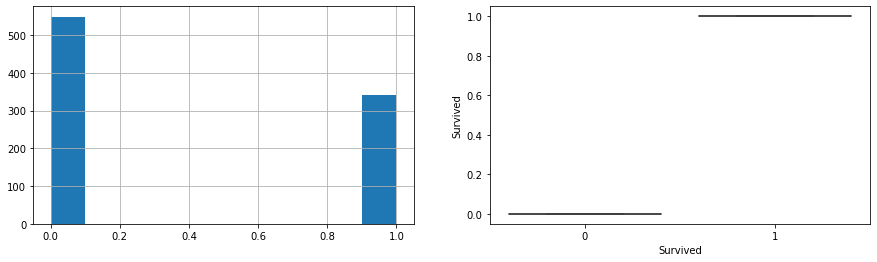

Pclass


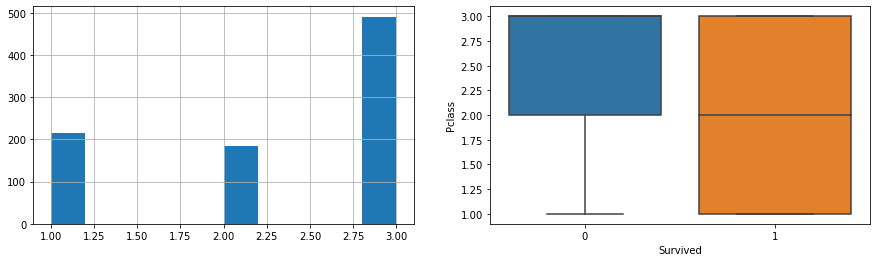

Age


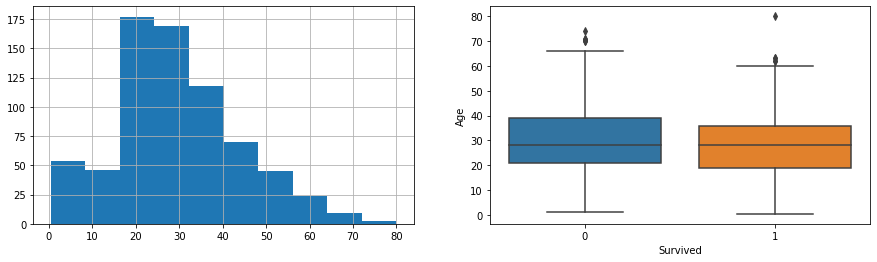

SibSp


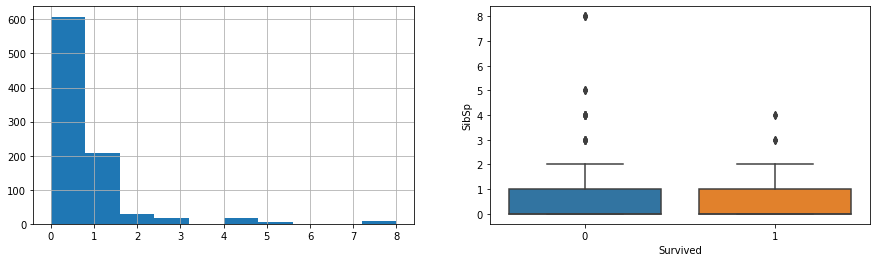

Parch


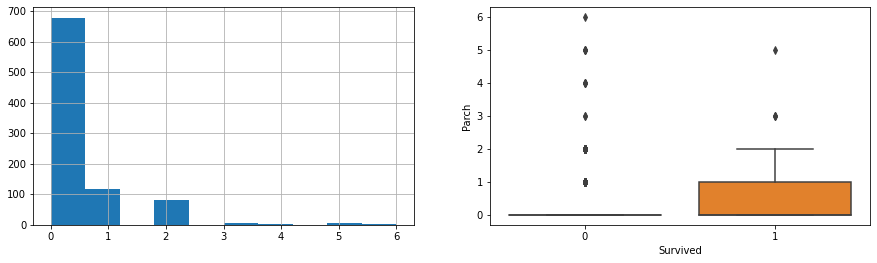

Fare


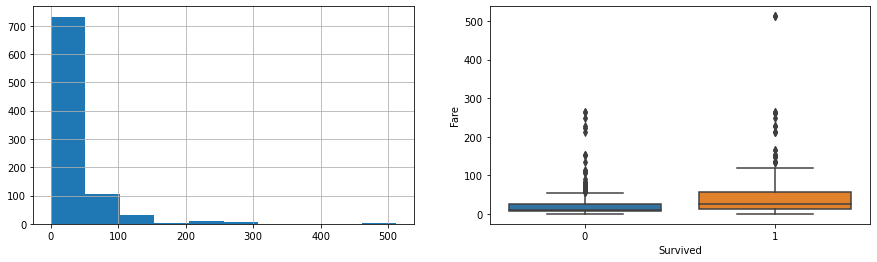

In [13]:
#Plot bar charts and box plots for all the numerical data:
for col in datatrn_num.loc[:, datatrn_num.columns!='PassengerId']:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    datatrn_num[col].hist()
    plt.subplot(1,2,2)
    sns.boxplot(x=datatrn_num.Survived, y=datatrn_num[col])
    plt.show()

### OBSERVATIONS:
* As stated previously, the majority of passengers in this data set died, third class passengers had the highest mortality, and first class had the best survival rates
* For passengers where age data is provided, there appears to be no drastic difference between the age distribution of survivors and deceased.  The age distribution of the survivors has a slightly smaller average
* Sibling/spouse data shows that many people traveled alone, but no additional conclusions can be drawn yet as the distributions for survival and death seem to be approximately the same
* For parent/child data, the survivor distribution suggests that not going totally alone (or having a child or parent with you) tended to increase the chances of survival
* Paying a higher fare seems to have a positive correlation with survival, however, this could be confounded with the passenger's class

### 1.3.4 - Statistical Plots of Sex/Embarked Data and Additional Plots for Class and 'Parch' Data

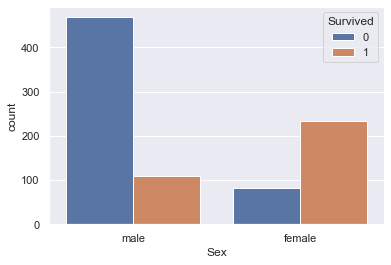

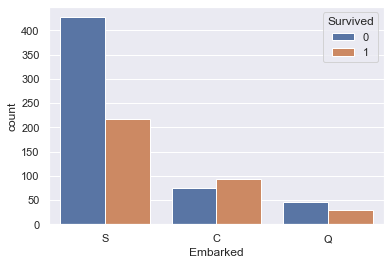

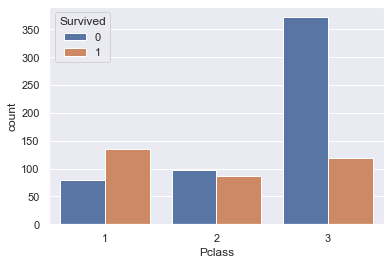

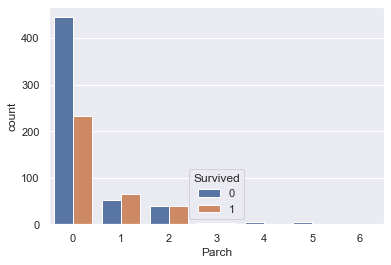

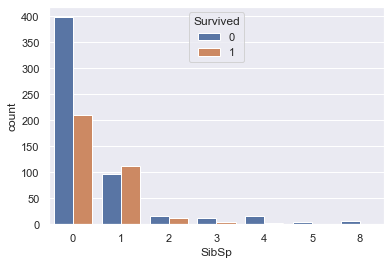

In [138]:
#Create count plots for all relevant categorical data.  Cabin is excluded due to the high number of invidiual cabins.
sns.countplot(x=datatrn.Sex, hue=datatrn.Survived)
plt.show()
sns.countplot(x=datatrn.Embarked, hue=datatrn.Survived)
plt.show()
sns.countplot(x=datatrn.Pclass, hue=datatrn.Survived)
plt.show()
sns.countplot(x=datatrn.Parch, hue=datatrn.Survived)
plt.show()
sns.countplot(x=datatrn.SibSp, hue=datatrn.Survived)
plt.show()

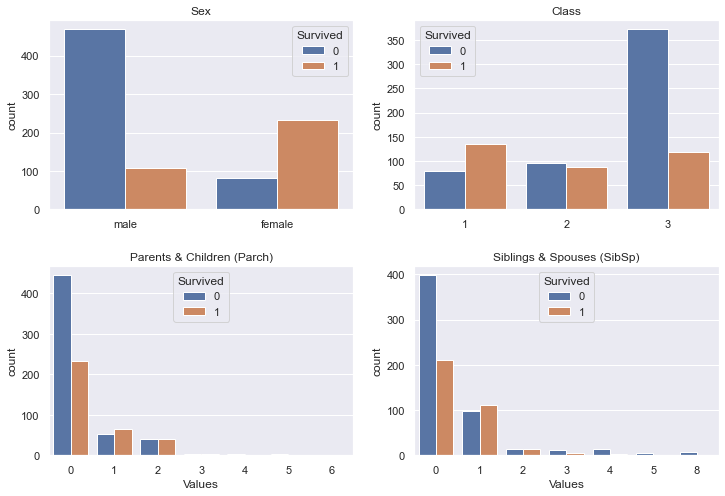

In [158]:
# Above plots formatted for PORTFOLIO
plt.figure(figsize=(12,8)).patch.set_facecolor('white')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=.3)

plt.subplot(2,2,1)
plt.title('Sex')
sns.countplot(x=datatrn.Sex, hue=datatrn.Survived)
plt.xlabel('')

# plt.subplot(2,2,1)
# sns.countplot(x=datatrn.Embarked, hue=datatrn.Survived)

plt.subplot(2,2,2)
plt.title('Class')
sns.countplot(x=datatrn.Pclass, hue=datatrn.Survived)
plt.xlabel('')

plt.subplot(2,2,3)
plt.title('Parents & Children (Parch)')
sns.countplot(x=datatrn.Parch, hue=datatrn.Survived)
plt.xlabel('Values')


plt.subplot(2,2,4)
plt.title('Siblings & Spouses (SibSp)')
sns.countplot(x=datatrn.SibSp, hue=datatrn.Survived)
plt.xlabel('Values')


plt.show()

### OBSERVATIONS:
* Men had a much higher mortality rate than women, giving credence to the "women and children first" phrase
* It could be completely coincidental, but people embarking from location "C" had a lower mortality rate
* First class passengers had the lowest mortality rate, second class was approximately 50/50, and third class had by far the highest mortality rate
* Traveling alone, seemed to increase mortality.  Chances for survival appear to be better for those with one or two parents or children aboard


### 1.3.5 - Examination of Age Data

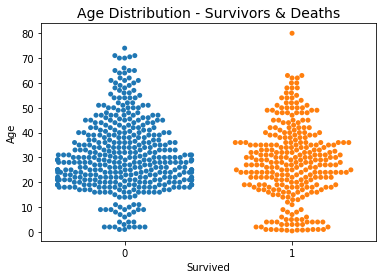

In [15]:
#A swarm plot can provide a quick look at the age distribution for srvivors and casualties
plt.figure(figsize=(6,4))
plt.title('Age Distribution - Survivors & Deaths', fontsize=14)
sns.swarmplot(x=datatrn_num.Survived, y=datatrn_num['Age'], data=datatrn)
plt.show()

### OBSERVATIONS:
* While this must be explored further, it can be seen that more young children appear to have survived than not

### 1.3.6 - Correlation Plots

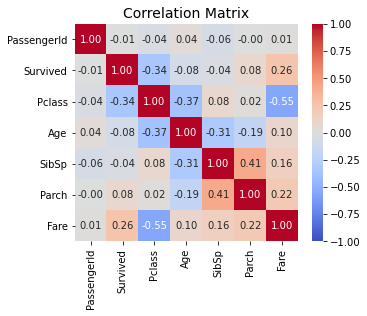

In [16]:
#Create a correlation plot with all numerical data
plt.figure(figsize=(5,4))
plt.title('Correlation Matrix', fontsize=14)
sns.heatmap(datatrn.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt='.2f')
plt.show()

### OBSERVATIONS:
* In the above correlation plots, it can be seen that class and fare have the highest correlation to survival (realtively speaking) but that these are not necessarily strong correlations

## 1.4 - First Round of Data Cleaning

At this point, it's clear that the passenger Name, PassengerId, and Ticket are not pertinent to this problem and should be dropped.

The cabin number likely should also be dropped, but given the high number of null values for this category, it would be good to see if being designated a cabin correlates to anything.  If not, the data should be dropped.  Indicating whether or not a cabin has been assigned can be done by adding a column with one-hot encoding.

There are many missing data points for age, which makes it difficult to use this information in the model.  It may be helpful to determine if not having age data correlates to anything at all.  This can be done by adding a column "Age_data" that is one-hot encoded for if the passenger age is provided or not.

The Embarked and especially the Sex data for each passenger should be one-hot encoded.

Encoding all important variables will likely be required for modeling since some of the models cannot use categorical data types.

### 1.4.1 - Dropping Uninformative Columns

In [17]:
#Create a new dataset without uninformative columns to further develop
newtrain = datatrn.drop(columns = ['PassengerId', 'Name', 'Ticket'])
newtrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


### 1.4.2 - One-hot Encoding Categorical Data (Except Class)

### 1.4.2.1 - One-hot encode "Sex" and "Embarked" Data

In [18]:
#Use get_dummies to one-hot encode categorical data
newtrain = pd.get_dummies(data=newtrain, columns = ['Sex', 'Embarked'])
newtrain

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,NaN,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,C85,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,NaN,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,C123,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,B42,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,NaN,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,C148,0,1,1,0,0


### 1.4.2.2 - One-hot Encode Presenece of "Age_Data" and "Cabin_Data" (Present or Not)
https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

In [19]:
newtrain['Age_data'] = np.where(newtrain.Age.isnull()==False, 1, 0)
newtrain['Cabin_data'] = np.where(newtrain.Cabin.isnull()==False, 1, 0)
print(newtrain['Age_data'].value_counts())
print(newtrain['Cabin_data'].value_counts())
newtrain

1    714
0    177
Name: Age_data, dtype: int64
0    687
1    204
Name: Cabin_data, dtype: int64


,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_data,Cabin_data
0,0,3,22.0,1,0,7.2500,NaN,0,1,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,C85,1,0,1,0,0,1,1
2,1,3,26.0,0,0,7.9250,NaN,1,0,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,C123,1,0,0,0,1,1,1
4,0,3,35.0,0,0,8.0500,NaN,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,0,1,0,0,1,1,0
887,1,1,19.0,0,0,30.0000,B42,1,0,0,0,1,1,1
888,0,3,NaN,1,2,23.4500,NaN,1,0,0,0,1,0,0
889,1,1,26.0,0,0,30.0000,C148,0,1,1,0,0,1,1


### 1.4.2.3 - One-hot Encode "Pclass"
In this particular case, these are categorical variables in essence.  They could have been called "upper", "middle", and "lower".  Class is also not a continuous quantity per-se.

In [20]:
#One-hot encode Pclass
newtrain = pd.get_dummies(data=newtrain, columns = ['Pclass'])
newtrain

,Survived,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_data,Cabin_data,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,NaN,0,1,0,0,1,1,0,0,0,1
1,1,38.0,1,0,71.2833,C85,1,0,1,0,0,1,1,1,0,0
2,1,26.0,0,0,7.9250,NaN,1,0,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,C123,1,0,0,0,1,1,1,1,0,0
4,0,35.0,0,0,8.0500,NaN,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,NaN,0,1,0,0,1,1,0,0,1,0
887,1,19.0,0,0,30.0000,B42,1,0,0,0,1,1,1,1,0,0
888,0,NaN,1,2,23.4500,NaN,1,0,0,0,1,0,0,0,0,1
889,1,26.0,0,0,30.0000,C148,0,1,1,0,0,1,1,1,0,0


### 1.4.3 - Correlation Plot with One-hot Encoded Data

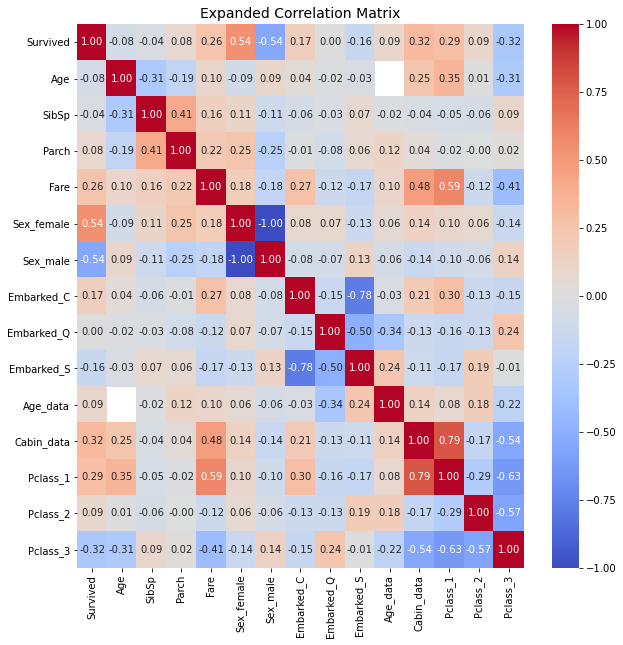

In [21]:
#Create a correlation plot with the latest encoded data set
plt.figure(figsize=(10,10))
plt.title('Expanded Correlation Matrix', fontsize=14)
sns.heatmap(newtrain.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt='.2f')
plt.show()

### Observations:
* From the correlation data, the largest values appear to suggest a small or medium correlation between survival and:
    * Sex
    * Fare
    * Whether or not cabin data is provided
    * Being a first class passenger
    * Being a third class passenger

### 1.4.4 - Bar Charts of Survivors and Deceased for Critical Variables

Age


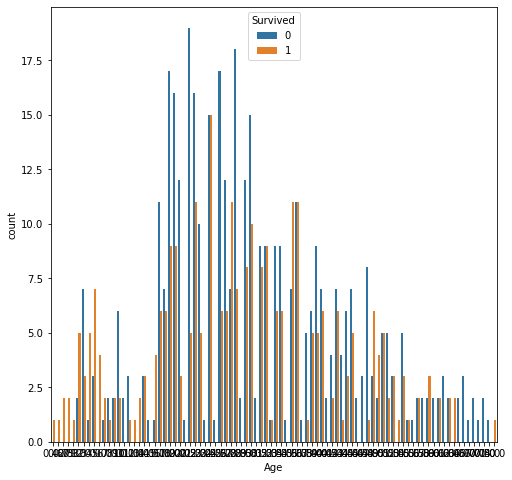

SibSp


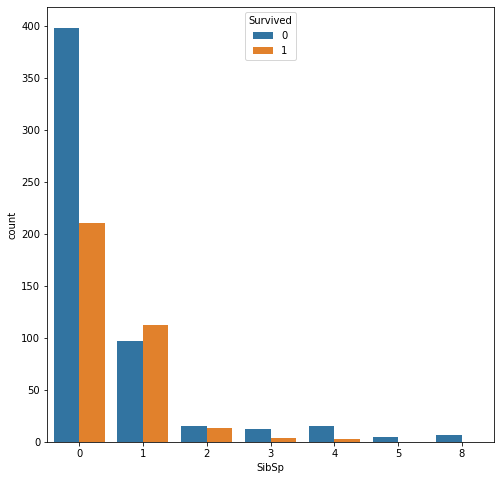

Parch


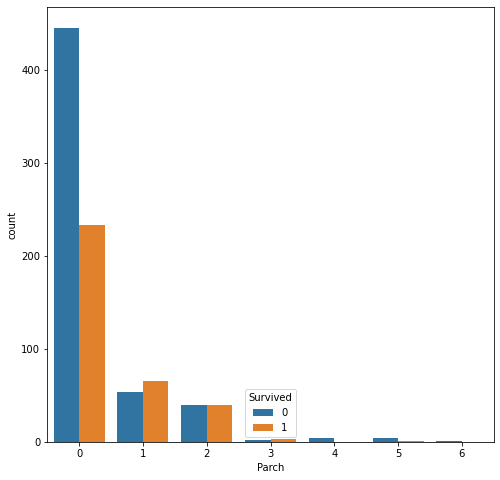

Age_data


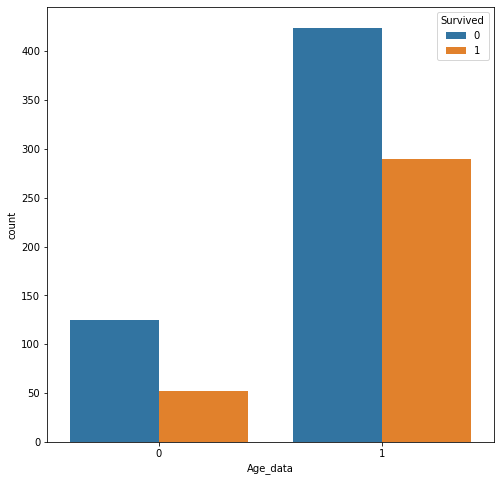

Cabin_data


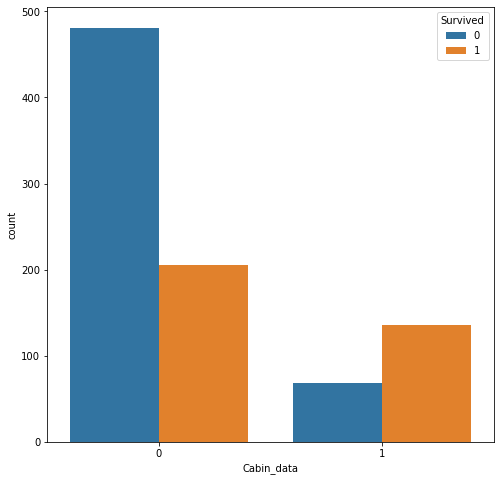

In [22]:
#Create count plots for specified variables segregating the data by survived and deceased:
for col in newtrain[['Age','SibSp','Parch','Age_data', 'Cabin_data']]:
    print(col)
    
    plt.figure(figsize=(8,8))
    sns.countplot(x=newtrain[col], hue=newtrain.Survived)
    plt.show()

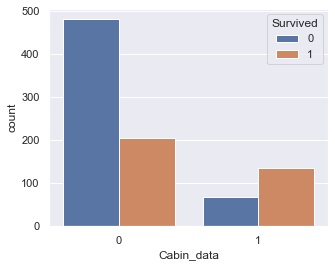

In [162]:
#Cabin Data Plots
    
plt.figure(figsize=(5,4)).patch.set_facecolor("white")
sns.countplot(x=newtrain['Cabin_data'], hue=newtrain.Survived)
plt.show()

### OBSERVATIONS:
* Age:  It can be seen that the age distribution for survivors is slightly younger than the deceased, which makes sense as it would seem that much older people would have a hard time with the trauma of a sinking ship in the arctic.  Further, there appear to be more children in the survivor distribution, again supporting the women and children first theme
* Sibsp:  Folks with one or two other family members on board had better survival rates
* Parch:  Having one's parents or children aboard also seemed to have a slightly better survival rate
* Age data:  Having age data or not does not seem to indicate significantly higher or lower mortality
* Cabin data:  Those who were assigned a cabin had noticeably better survival rates than those who were not

## 1.5 - Age Analysis of Survivors and Deceased

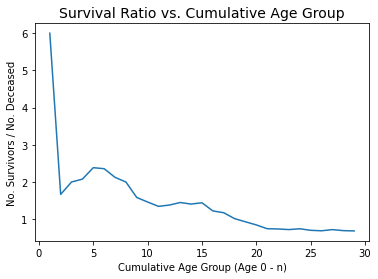

In [23]:
#Create a new data set on which to perform some analysis of survival by age from 1 to 29:
age_srv = newtrain

rows = []
for x in range(1,30):
    
    alive = age_srv[(age_srv.Survived == 1) & (age_srv.Age<=x)]  #create a data set of survivors <= age x, 
    dead = age_srv[(age_srv.Survived == 0) & (age_srv.Age<=x)]   #create a data set of deceased <= age x

    rows.append([x, len(alive.index) / len(dead.index)])         #for x, add the ratio of survivors/deceased to a dataframe
    
rolling_cutoff = pd.DataFrame(rows, columns=['Age_Cutoff', 'Ratio'])
rolling_cutoff.Age_Cutoff

#Plot the survival ratio for each age from 1-29
plt.title('Survival Ratio vs. Cumulative Age Group', fontsize = 14)
plt.xlabel('Cumulative Age Group (Age 0 - n)')
plt.ylabel('No. Survivors / No. Deceased')
plt.plot(rolling_cutoff.Age_Cutoff, rolling_cutoff.Ratio)

### OBSERVATIONS:
* Younger children tend to have a higher survival rate than adults, with babies and children around 5 years old having the best survival ratios
* Around age 9, the survival ratio tends to plateau to about 1.5.  Beyond that there is a slight increase prior to falling below 1

### FEATURE ENGINEERING DECISIONS:
* As age 9 is the beginning of the plateau, it will be chosen as the cutoff age below which a child is considered "young"
* Addition to being the beginning of the plateau, this is also about the age when children start to grow more quickly.  This is important, as an assumption is being made that smaller children could be more readily transported to life boats and be kept warm and fed with limited supplies.

### 1.5.1 - Statistical Significance of Age Findings
While it appears that younger passengers had a higher survival rate, it is unclear whether or not this is representative of the entire population of passengers.  It may be possible that young children have no higher chance of survival compared to any other age group and that this training data set had an abnormally high amount of child survivors.

To estimate how likely this scenario is, it will be temporarily assumed that all passengers have the same chance of survival equal to p, and that for the sample of n children under age 9 from above, k children survived.

The survival probability will be taken from an outside source that counts the mortality rate of the entire popultion of the Titanic and not just those in the training data set.  From https://www.britannica.com/topic/Titanic, it can be seen that 68% of the individuals aboard died, and the survival rate is 32%.  Thus p will be taken as .32.

Values for n and k will be determined below from the above data.

Given that there are two outcomes (survived or deceased) this will be treated as a binomial distribution, and a probabilty mass function will be used to determine the probability of this many children surviving without any propensity towards survival over other age groups.

In [24]:
#What is the total number of childen under age 9 in the training data set?

n = len(age_srv[(age_srv.Age<=9)])

#n = len(alive.index) + len(dead.index)
print(n)

#How many of these children under age 9 survived?
k = len(age_srv[(age_srv.Survived == 1) & (age_srv.Age<=9)])
print(k)

#Set the probability p to .68
p=.32

62
38


In [25]:
#Run the probability mass function to determine the probability of 38 out of 62 children surviving
prob_38_62 = binom.pmf(p=p, n=n, k=k)
prob_38_62

1.4540633063154135e-06

This probability is for exactly 38 out of 62 children surviving.  It would be better to determine the probability of at least 38 children surviving in order to evaluate how improbable this outcome is.  The hypothesis (simply put) is that the children have a better survival rate than other age groups, and thus it needs to be shown that having any quantity inclusive of 38 (thus 38 or more) survivors is relatively unlikely as compared to their actual survival rate.

For this, a cumulative density function will be used.

In [26]:
#Define the cumulative density function (CDF).
#As the CDF works from low to high, the probability of the high end (38 or more) is 1 minus the probbility of the low end
# (37 or fewer survivors) ... note that k is inclusive
cdf_38_62 = 1 - binom.cdf(p=p, n=n, k=37)
cdf_38_62

2.026482761374737e-06

### OBSERVATIONS:
* From the above calculations, the probability of at least 38 out of 62 people surviving (assuming that they all have the same survival probability of 32%) is .0002%
* Given that this p value is well less than the 5% required to reject the null hypothesis (null hypothesis being that all age groups have the same probability of survival), the null hypothesis can be rejected and it is probable that young children do not have the same probability of survival as other age groups
* Put simply, the chances of 38 out of 68 people surviving with such a low survival probability is so rare that there must be something about this age group that increases its chances of survival
* Thus, considering the age of the passenger is a useful feature to add to the model

# 2 - Modeling

## 2.1 - Data Preparation
* Separate the target variables from the remaining data
* Create a new dataset that removes unneeded variables that likely wont affect the outcome
 
NOTE:  The logistic regression model cannot handle NaN values which is why Age was removed for now.

### 2.1.1 - New Data Set:  Derive from Original Pre-encoded 'datatrn' 

In [27]:
train = datatrn.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age'])

xtrain = train.drop(columns = ['Survived'])
xtrain = pd.get_dummies(xtrain, drop_first = True)
ytrain = datatrn.Survived

## 2.2 - Logistic Regression Model

### 2.2.1 - Logistic Regression, Default Model

In [28]:
#Call logistic regression model
log_reg= LogisticRegression()

#Fit the model:
log_reg.fit(xtrain,ytrain)

LogisticRegression()

In [29]:
pd.Series(log_reg.coef_[0], index=xtrain.columns).sort_values(ascending=False)

Embarked_Q    0.125757
Fare          0.002684
Parch        -0.042062
SibSp        -0.217078
Embarked_S   -0.354180
Pclass       -0.825424
Sex_male     -2.593683
dtype: float64

* Here it's seen that Sex and Class are the two most important factors affecting survival.  
* One also had better chances if they did not embark from location S.

In [30]:
#Predict the data based on the default model
ytrn_pred = log_reg.predict(xtrain)

In [169]:
#Define a function to create a confusion matrix and classifcation report
def cnfsnmtrx(act, pred):
    print(classification_report(act, pred))
    matrix = confusion_matrix(act, pred)
    plt.figure(figsize=(4,3)).patch.set_facecolor("white")
    sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



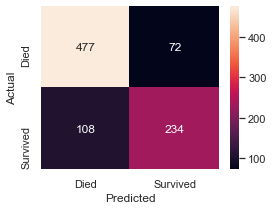

In [170]:
cnfsnmtrx(ytrain, ytrn_pred)

### 2.2.1.1 - Iterate Default Model, Test Performance on Unseen Data
Using ShuffleSplit, the training data will be split into 30 randomly sampled training and test data sets.  These will then all be run through the model and the average accuracy for all training and test data sets will be presented.  This has the effect of making different training and test data sets to evaluate model performance on unseen data, and optimize to prevent over-fitting.

In [33]:
#Iterate this default model to see how it would perform on various train/test splits
#Shuffle split will create a specified number of train and test data sets from the original training data
shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)

paragrid = [
    {
    }
]

#Tell GridSearchCV what to look at.  Run the log_reg model, with the parameter grid 
#  (paragrid) dictionary of the hyper-parameters, cross validation of using shuffle split, and other settings.
optopara = GridSearchCV(LogisticRegression(), param_grid = paragrid, cv = shuff, verbose=True, n_jobs=-1, return_train_score = True)

#Now set a new function with the input training and validation data
optimized1st = optopara.fit(xtrain,ytrain)

#Now return the vairalbes for the best estimator:
optimized1st.best_estimator_

#Store the mean accuracy score (across all 30 train/test splits) for the training and test fits
test_results = optimized1st.cv_results_['mean_test_score']
train_results = optimized1st.cv_results_['mean_train_score']

#Create a dataframe of results for train and test fits
results1 = pd.DataFrame()
results1 = pd.DataFrame(optimized1st.cv_results_['mean_test_score'])
results1.columns=['Validation']
trainy = pd.DataFrame(optimized1st.cv_results_['mean_train_score'])
results1['Train'] = trainy
results1.describe()


Fitting 30 folds for each of 1 candidates, totalling 30 fits


,Validation,Train
count,1.000000,1.000000
mean,0.795647,0.796094
std,NaN,NaN
min,0.795647,0.796094
25%,0.795647,0.796094
50%,0.795647,0.796094
75%,0.795647,0.796094
max,0.795647,0.796094


In [34]:
#Create a dataframe with the train and test accuracies for the best model.  Specify model name and input data.
firstframe = pd.DataFrame(results1.loc[optimized1st.best_index_]).T
firstframe['Name'] = 'First,LR'
firstframe['Input'] = "xtrain"
firstframe = firstframe.set_index('Name')
firstframe['True Surv.'] = confusion_matrix(ytrain, ytrn_pred)[1,1]
firstframe['True Death'] = confusion_matrix(ytrain, ytrn_pred)[0,0]
firstframe['False Surv.'] = confusion_matrix(ytrain, ytrn_pred)[0,1]
firstframe['False Death'] = confusion_matrix(ytrain, ytrn_pred)[1,0]
firstframe['Full Data Accu.'] = log_reg.score(xtrain,ytrain)
firstframe

,Validation,Train,Input,True Surv.,True Death,False Surv.,False Death,Full Data Accu.
Name,,,,,,,,
"First,LR",0.795647,0.796094,xtrain,234,477,72,108,0.79798


### 2.2.1.2 - Explore Mis-categorized Data (Make the Errors Dataframe from Default Model on Full Training Data)

In [35]:
#Make a new dataframe with allimportant variables, survival data, and predictions

#First, ytrn_pred is an array, not a Series or a Dataframe, so we need to make it a dataframe or it wont concatenate:
ytrn_pred_df = pd.DataFrame(ytrn_pred, columns=['Prediction'])
ytrn_pred_df

#Now, acutally make a dataframe with everything:
results = pd.concat([xtrain, ytrain, ytrn_pred_df], axis=1)

#Add back in the age and cabin data
results['Age'] = newtrain.Age
results['Cabin_data'] = newtrain.Cabin_data
results['Srv_yscore'] = log_reg.predict_proba(xtrain)[:,1]

#Make an errors dataframe with all the passengers that it got totally wrong...
errors = results[results.Survived != results.Prediction]
errors

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived,Prediction,Age,Cabin_data,Srv_yscore
14,3,0,0,7.8542,0,0,1,0,1,14.0,0,0.608437
17,2,0,0,13.0000,1,0,1,1,0,NaN,0,0.211868
18,3,1,0,18.0000,0,0,1,0,1,31.0,0,0.562398
21,2,0,0,13.0000,1,0,1,1,0,34.0,1,0.211868
23,1,0,0,35.5000,1,0,1,1,0,28.0,1,0.394632
...,...,...,...,...,...,...,...,...,...,...,...,...
869,3,1,1,11.1333,1,0,1,1,0,4.0,0,0.082923
882,3,0,0,10.5167,0,0,1,0,1,22.0,0,0.610138
885,3,0,5,29.1250,0,1,0,0,1,39.0,0,0.682972
888,3,1,2,23.4500,0,0,1,0,1,NaN,0,0.545227


### 2.2.1.2.1 - Basic Plots of Mis-Categorized Passengers for Critical Variables

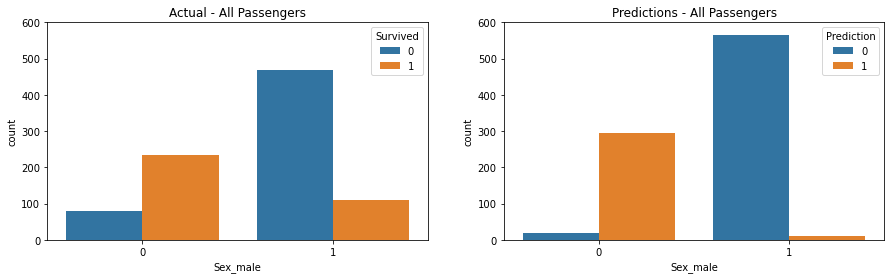

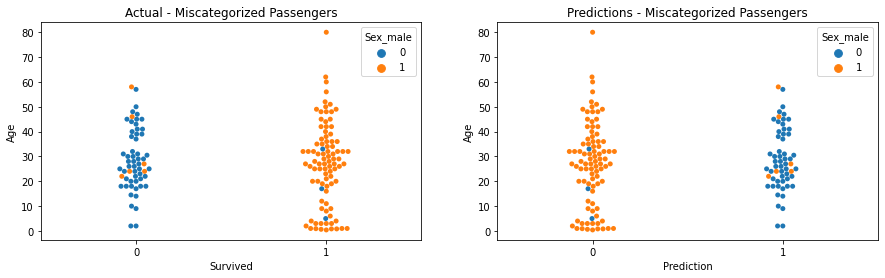

In [36]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.ylim(0, 600)
plt.title('Actual - All Passengers')
sns.countplot(x=results.Sex_male, hue=results.Survived)
plt.subplot(1,2,2)
plt.ylim(0, 600)
plt.title('Predictions - All Passengers')
sns.countplot(x=results.Sex_male, hue=results.Prediction)

plt.show()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Actual - Miscategorized Passengers')
sns.swarmplot(x=errors.Survived, y=errors.Age, hue=errors.Sex_male, data=errors)

plt.subplot(1,2,2)
plt.title('Predictions - Miscategorized Passengers')
sns.swarmplot(x=errors.Prediction, y=errors.Age, hue=errors.Sex_male, data=errors)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Srv_yscore'>

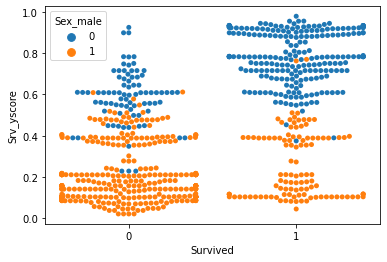

In [37]:
#Plot all passenger's yscores against their survival classification
sns.swarmplot(x=results.Survived, y=results.Srv_yscore, hue=results.Sex_male, data=results)

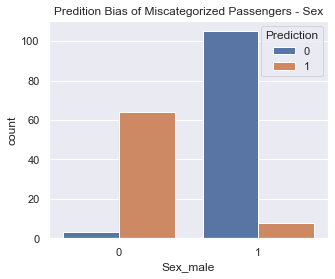

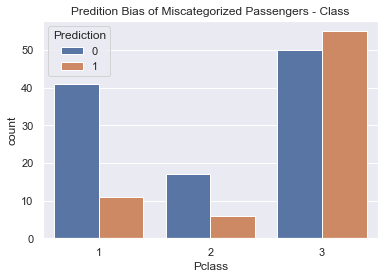

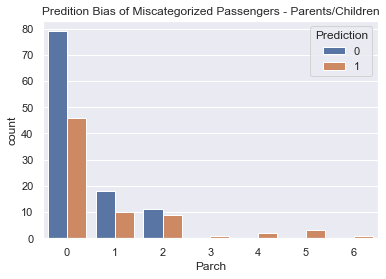

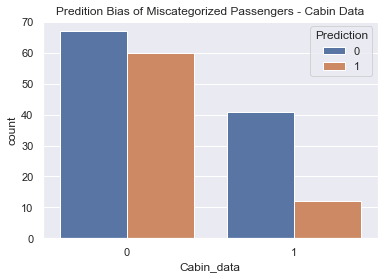

In [168]:
plt.figure(figsize=(5,4)).patch.set_facecolor("white")
plt.title('Predition Bias of Miscategorized Passengers - Sex')
sns.countplot(x=errors.Sex_male, hue=errors.Prediction)
plt.show()

plt.title('Predition Bias of Miscategorized Passengers - Class')
sns.countplot(x=errors.Pclass, hue=errors.Prediction)
plt.show()

plt.title('Predition Bias of Miscategorized Passengers - Parents/Children')
sns.countplot(x=errors.Parch, hue=errors.Prediction)
plt.show()

plt.title('Predition Bias of Miscategorized Passengers - Cabin Data')
sns.countplot(x=errors.Cabin_data, hue=errors.Prediction)
plt.show()

In [39]:
#Mortality rate calcualtions:

#Men Mortality:
print('Actual Male Mortality: ', results.Sex_male[(results.Survived == 0) & (results.Sex_male == 1)].count() / results.Sex_male[results.Sex_male == 1].count() * 100,'%')
print('Predicted Male Mortality: ', results.Sex_male[(results.Prediction == 0) & (results.Sex_male == 1)].count() / results.Sex_male[results.Sex_male == 1].count() * 100,'%')

#Women Mortality:
print('Actual Female Mortality: ', results.Sex_male[(results.Survived == 0) & (results.Sex_male == 0)].count() / results.Sex_male[results.Sex_male == 1].count() * 100,'%')
print('Predicted Female Mortality: ', results.Sex_male[(results.Prediction == 0) & (results.Sex_male == 0)].count() / results.Sex_male[results.Sex_male == 1].count() * 100,'%')


Actual Male Mortality:  81.10918544194108 %
Predicted Male Mortality:  97.92027729636048 %
Actual Female Mortality:  14.038128249566725 %
Predicted Female Mortality:  3.466204506065858 %


### OBSERVATIONS:
* When examining the y-scores represented as the probability of survival, the assumption is that anyone with a probability below .5 will die, and anyone above .5 will live.  It was hypothesized that perhaps many of the men who were falsely categorized as deceased may have had a survival probability close to .5.  In reality, this is not the case.  The probabilities for men who survived and men who died in actuality are evenly distributed below .5.  Men incorrectly categorized as deceased had a VERY low probability of survial assigned to them.
    * What this means is that the y-score threshold cannot be modified to correct for this male mortality bias because at the same time that it will re-categorize men who were incorrectly predicted to die as survivors, a y-score modification will also re-categorize just about as many men that correctly predicted to die as survivors.  In other words, for every false negative that is fixed, an approximate number of false positives will be created which does not appear to have a net benefit on this model.
* Looking at the both the whole training data set and th miscategorized passengers for survival by sex, it appears that the model made the predictions almost entirely around the sex of the passenger.  Men are predicted to die, and women to live, at disproportionate rates.  The model appears to have taken this trend to an extreme.
* The class data for miscategorized passengers goes entirely against the established trends that class 1 passengers will survive better and class 3 passengers have higher mortality.
* The above two bullets would suggest the the model is possibly putting too much emphasis on the passenger's sex, and not enough on the passenger's class.

### 2.2.2 - Feature Engineering:  Logistic Regression, Default Model, New Input Data Sets

### 2.2.2.1 - New Data Set:  Add Cabin Data (yes/no) and Young Data (Age < 9) 
Below, the same data is taken, but a column is added to indicate whether or not a cabin was assigned, and another column to indicate whether or not the passenger was less than 9 years old if their age was reported.

In [40]:
#Create New Data Set with 'Young' and 'Cabin' Varibales
train2 = datatrn.copy()
train2['Cabin_data'] = np.where(train2.Cabin.isnull()==False, 1, 0)
train2['Young'] = np.where(train2.Age < 9, 1, 0)
train2 = train2.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age'])

xtrain2 = train2.drop(columns = ['Survived'])
xtrain2 = pd.get_dummies(xtrain2, drop_first = True)
ytrain2 = datatrn.Survived

In [41]:
#We can then fit the model:
log_reg.fit(xtrain2,ytrain2)

LogisticRegression()

In [42]:
ytrn_pred2 = log_reg.predict(xtrain2)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.78      0.72      0.75       342

    accuracy                           0.81       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.81      0.81      0.81       891

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



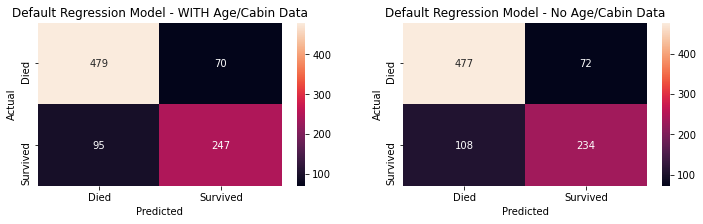

In [43]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)

print(classification_report(ytrain2, ytrn_pred2))
matrix = confusion_matrix(ytrain2, ytrn_pred2)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Default Regression Model - WITH Age/Cabin Data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,2,2)

print(classification_report(ytrain, ytrn_pred))
matrix = confusion_matrix(ytrain, ytrn_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Default Regression Model - No Age/Cabin Data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

### OBSERVATION:
* The model appears to perform better with the cabin data included.

### 2.2.2.2 - New Data Set:  Keep Cabin Data (yes/no) and Young Data (Age < 9), Drop Fare Data

                odds
Young       8.079687
Cabin_data  1.784585
Embarked_Q  0.856276
Parch       0.845658
SibSp       0.702152
Embarked_S  0.624742
Pclass      0.478185
Sex_male    0.065548
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       549
           1       0.79      0.73      0.76       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



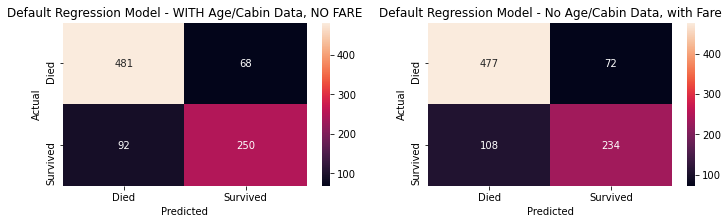

In [44]:
#Create New Data Set with 'Young' and 'Cabin' Varibales, but drop Fare Data
train3 = datatrn.copy()
train3['Cabin_data'] = np.where(train3.Cabin.isnull()==False, 1, 0)
train3['Young'] = np.where(train3.Age < 9, 1, 0)
train3 = train3.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age', 'Fare'])

xtrain3 = train3.drop(columns = ['Survived'])
xtrain3 = pd.get_dummies(xtrain3, drop_first = True)
ytrain3 = datatrn.Survived

#We can then fit the model:
log_reg.fit(xtrain3,ytrain3)

#Coefficients
pd.Series(log_reg.coef_[0], index=xtrain3.columns).sort_values(ascending=False)
odds3 = np.exp(log_reg.coef_[0])
print(pd.DataFrame(odds3, xtrain3.columns, columns=['odds']).sort_values(by='odds', ascending=False) )

#Creating the predicted Dataframe
ytrn_pred3 = log_reg.predict(xtrain3)


#Plotting Confusion Matrices
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
print(classification_report(ytrain3, ytrn_pred3))
matrix = confusion_matrix(ytrain3, ytrn_pred3)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Default Regression Model - WITH Age/Cabin Data, NO FARE')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,2,2)
print(classification_report(ytrain, ytrn_pred))
matrix = confusion_matrix(ytrain, ytrn_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Default Regression Model - No Age/Cabin Data, with Fare')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

### OBSERVATIONS:
* Including the age and cabin features while removing the fare variable seems to have improved the accuracy of the model while running the default parameters.

### 2.2.2.3 - Run Previous Section Data Set Through a Test/Train Sweep w/Default Model Parameters

In [45]:
shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)

#Enter default model parameters into gridsearchcv.
paragrid = [
    {'penalty' : ['l2'],
    'C' : [1],
    'solver' : ['lbfgs'],
     'max_iter' : [100]
    }
]

#Now we tell GridSearchCV what to look at.  Basically (by argument) run the log_reg model, with the parameter grid 
#  (paragrid) dictionary of the hyper-parameters we just made, cross validation of 3, and other settings.
optopara = GridSearchCV(LogisticRegression(), param_grid = paragrid, cv = shuff, verbose=True, n_jobs=-1, return_train_score = True)

#Now crreate a new function with the input training and validation data
optimizedLR = optopara.fit(xtrain3,ytrain3)

#Now spit out the best estimator:
optimizedLR.best_estimator_

test_results = optimizedLR.cv_results_['mean_test_score']
train_results = optimizedLR.cv_results_['mean_train_score']

results1 = pd.DataFrame()
results1 = pd.DataFrame(optimizedLR.cv_results_['mean_test_score'])
results1.columns=['Validation']
trainy = pd.DataFrame(optimizedLR.cv_results_['mean_train_score'])
results1['Train'] = trainy
results1.describe()

Fitting 30 folds for each of 1 candidates, totalling 30 fits


,Validation,Train
count,1.000000,1.000000
mean,0.813433,0.817282
std,NaN,NaN
min,0.813433,0.817282
25%,0.813433,0.817282
50%,0.813433,0.817282
75%,0.813433,0.817282
max,0.813433,0.817282


### OBSERVATIONS:
* Iterating the default model against the 'train3' data set appears to yield comparable performance on both the training and test data established with the shuffle split algorithm

Now that a data set which yields improved results has been developed and has comparable train/test performance, the model parameters can be optimized in an attempt to increase accuracy.

### 2.2.3 - Logistic Regression, Coarse Optimization
Using https://www.youtube.com/watch?v=pooXM9mM7FU as a guide, an iterative hyper-parameter tuner will be employed.

You can also find an entire page on this modeling algorithm here:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [46]:
shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)

paragrid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 21),
    'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
     'max_iter' : [100, 1000, 2500, 5000]
    }
]

#Now we tell GridSearchCV what to look at.  Basically (by argument) run the log_reg model, with the parameter grid 
#  (paragrid) dictionary of the hyper-parameters we just made, cross validation of 3, and other settings.
optopara = GridSearchCV(LogisticRegression(), param_grid = paragrid, cv = shuff, verbose=True, n_jobs=-1, return_train_score = True)

#Now crreate a new function with the input training and validation data
optimizedLR = optopara.fit(xtrain3,ytrain3)

#Now spit out the best estimator:
optimizedLR.best_estimator_

test_results = optimizedLR.cv_results_['mean_test_score']
train_results = optimizedLR.cv_results_['mean_train_score']

results1 = pd.DataFrame()
results1 = pd.DataFrame(optimizedLR.cv_results_['mean_test_score'])
results1.columns=['Validation']
trainy = pd.DataFrame(optimizedLR.cv_results_['mean_train_score'])
results1['Train'] = trainy
results1.describe()

Fitting 30 folds for each of 1680 candidates, totalling 50400 fits


,Validation,Train
count,924.000000,924.000000
mean,0.779863,0.783976
std,0.069668,0.072806
min,0.618159,0.615302
25%,0.807090,0.808989
50%,0.814055,0.820225
75%,0.814055,0.820278
max,0.814303,0.820599


In [47]:
mod_para = optimizedLR.best_estimator_.get_params()
mod_para = pd.DataFrame(mod_para, index=['Values'])
mod_para.T

,Values
C,2.51189
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l1


### 2.2.4 - Logistic Regression, Fine Tuning

In [48]:
shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)

paragrid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-1, 1, 21),
    'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
     'max_iter' : [100, 1000, 2500, 5000]
    }
]

#Now we tell GridSearchCV what to look at.  Basically (by argument) run the log_reg model, with the parameter grid 
#  (paragrid) dictionary of the hyper-parameters we just made, cross validation of 3, and other settings.
optopara = GridSearchCV(LogisticRegression(), param_grid = paragrid, cv = shuff, verbose=True, n_jobs=-1, return_train_score = True)

#Now crreate a new function with the input training and validation data
optimizedLR = optopara.fit(xtrain3,ytrain3)

#Now spit out the best estimator:
optimizedLR.best_estimator_

test_results = optimizedLR.cv_results_['mean_test_score']
train_results = optimizedLR.cv_results_['mean_train_score']

results1 = pd.DataFrame()
results1 = pd.DataFrame(optimizedLR.cv_results_['mean_test_score'])
results1.columns=['Validation']
trainy = pd.DataFrame(optimizedLR.cv_results_['mean_train_score'])
results1['Train'] = trainy
results1.describe()

Fitting 30 folds for each of 1680 candidates, totalling 50400 fits


,Validation,Train
count,924.000000,924.000000
mean,0.812070,0.817131
std,0.003544,0.005213
min,0.791294,0.791653
25%,0.811443,0.815142
50%,0.813682,0.820171
75%,0.814055,0.820278
max,0.814801,0.820653


In [49]:
mod_para = optimizedLR.best_estimator_.get_params()
mod_para = pd.DataFrame(mod_para, index=['Values'])
mod_para.T

,Values
C,10
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


### 2.2.5 - Logistic Regression, Best Model Performance Metrics

In [50]:
#Run the best model against the whole dataframe
optimizedLR.best_estimator_.fit(xtrain3,ytrain3)
ytrn_pred3 = optimizedLR.best_estimator_.predict(xtrain3)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       549
           1       0.79      0.73      0.76       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



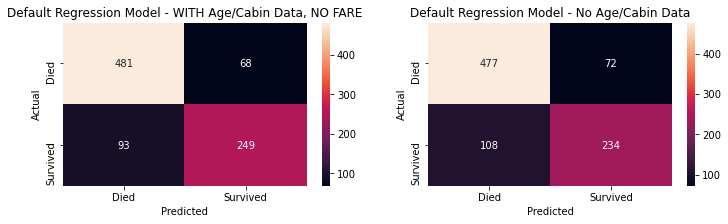

In [51]:
#Plot Confusion Matrices
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
print(classification_report(ytrain3, ytrn_pred3))
matrix = confusion_matrix(ytrain3, ytrn_pred3)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Default Regression Model - WITH Age/Cabin Data, NO FARE')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,2,2)
print(classification_report(ytrain, ytrn_pred))
matrix = confusion_matrix(ytrain, ytrn_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Default Regression Model - No Age/Cabin Data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [52]:
#Create a dataframe with the train and test accuracies for the best model.  Specify model name and input data.
LRframe = pd.DataFrame(results1.loc[optimizedLR.best_index_]).T
LRframe['Name'] = 'Best LR'
LRframe['Input'] = "xtrain3"
LRframe = LRframe.set_index('Name')
LRframe['True Surv.'] = confusion_matrix(ytrain3, ytrn_pred3)[1,1]
LRframe['True Death'] = confusion_matrix(ytrain3, ytrn_pred3)[0,0]
LRframe['False Surv.'] = confusion_matrix(ytrain3, ytrn_pred3)[0,1]
LRframe['False Death'] = confusion_matrix(ytrain3, ytrn_pred3)[1,0]
LRframe['Full Data Accu.'] = optimizedLR.best_estimator_.score(xtrain3,ytrain3)
LRframe

modframe = pd.concat([firstframe, LRframe])
modframe

,Validation,Train,Input,True Surv.,True Death,False Surv.,False Death,Full Data Accu.
Name,,,,,,,,
"First,LR",0.795647,0.796094,xtrain,234,477,72,108,0.797980
Best LR,0.814801,0.820599,xtrain3,249,481,68,93,0.819304


### OBSERVATIONS:
* The optimized model is clearly better in all metrics, and further is optimized around a train test split

## 2.3 - KNN Model
For the KNN Model, the data needs to be normalized (scaled) prior to running the model.

In [53]:
knn = KNeighborsClassifier()
ss = StandardScaler()

In [54]:
#Scale the data
xtrain3_ss = ss.fit_transform(xtrain3)

### 2.3.1 - KNN, Default model, K-Neighbors Sweep
The model is run through a range of the main parameter of the K-neighbors algorithm, k, to find an optimal k-range before the remainder of the parameters are optimized.

In [55]:
shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)

paragridKNN = [
    {'n_neighbors' : range(1,31),
    }
]

#Fitting knn on training data
optiparaKNN = GridSearchCV(KNeighborsClassifier(), param_grid = paragridKNN, cv = shuff, verbose=True, n_jobs=-1, return_train_score = True)

#Now crreate a new function, with the input training and validation data
optimizedKNN = optiparaKNN.fit(xtrain3_ss, ytrain3)

test_results_KNN = optimizedKNN.cv_results_['mean_test_score']
train_results_KNN = optimizedKNN.cv_results_['mean_train_score']

resultsKNN = pd.DataFrame()
resultsKNN = pd.DataFrame(optimizedKNN.cv_results_['mean_test_score'])
resultsKNN.columns=['Validation']
trainyKNN = pd.DataFrame(optimizedKNN.cv_results_['mean_train_score'])
resultsKNN['Train'] = trainyKNN
resultsKNN.describe()

Fitting 30 folds for each of 30 candidates, totalling 900 fits


,Validation,Train
count,30.000000,30.000000
mean,0.807550,0.826470
std,0.010701,0.006350
min,0.759577,0.817282
25%,0.806903,0.820787
50%,0.809328,0.826297
75%,0.811412,0.832959
max,0.819403,0.835045


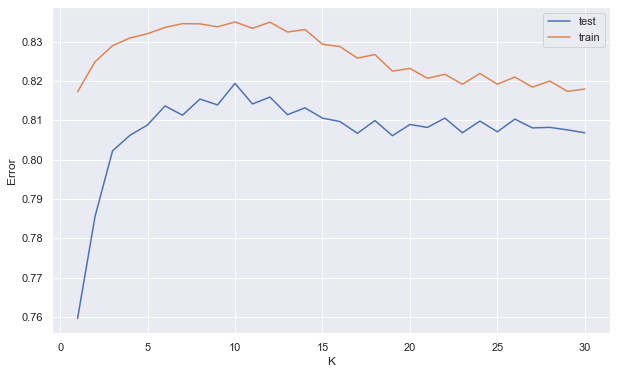

In [56]:
resultsKNN['K']=(range(1,31))
sns.set(font_scale=1.0)
plt.figure(figsize=(10,6))
plt.plot(resultsKNN.K,resultsKNN.Validation, label = 'test' )
plt.plot(resultsKNN.K,resultsKNN.Train, label = 'train')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.show()

In [57]:
mod_para = optimizedKNN.best_estimator_.get_params()
mod_para = pd.DataFrame(mod_para, index=['Values'])
mod_para.T

,Values
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,None
n_neighbors,10
p,2
weights,uniform


### 2.3.2 - KNN, Coarse Optimization

In [58]:
shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)

paragridKNN = [
    {'n_neighbors' : range(7,15),
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform', 'distance'],
    'p' : [1,2,3],
    'leaf_size' : [20, 30, 50]}
]

#Fitting knn on training data
optiparaKNN = GridSearchCV(KNeighborsClassifier(), param_grid = paragridKNN, cv = shuff, verbose=True, n_jobs=-1, return_train_score = True)

#knn.fit(x_train3_new, y_train3_new)
#Now crreate a new function with the input training and validation data
optimizedKNN = optiparaKNN.fit(xtrain3_ss, ytrain3)

test_results_KNN = optimizedKNN.cv_results_['mean_test_score']
train_results_KNN = optimizedKNN.cv_results_['mean_train_score']

resultsKNN = pd.DataFrame()
resultsKNN = pd.DataFrame(optimizedKNN.cv_results_['mean_test_score'])
resultsKNN.columns=['Validation']
trainyKNN = pd.DataFrame(optimizedKNN.cv_results_['mean_train_score'])
resultsKNN['Train'] = trainyKNN
resultsKNN.describe()

Fitting 30 folds for each of 432 candidates, totalling 12960 fits


,Validation,Train
count,432.000000,432.000000
mean,0.814330,0.849224
std,0.002779,0.017462
min,0.805970,0.829213
25%,0.812811,0.833173
50%,0.814552,0.848850
75%,0.816169,0.862279
max,0.819776,0.894114


In [59]:
mod_para = optimizedKNN.best_estimator_.get_params()
mod_para = pd.DataFrame(mod_para, index=['Values'])
mod_para.T

,Values
algorithm,ball_tree
leaf_size,50
metric,minkowski
metric_params,None
n_jobs,None
n_neighbors,12
p,1
weights,distance


### 2.3.3 - KNN, Fine Tuning

In [60]:
shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)

paragridKNN = [
    {'n_neighbors' : range(8,13),
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform', 'distance'],
    'p' : [1,2,3],
    'leaf_size' : [15, 20, 25]}
]

#Fitting knn on training data
optiparaKNN = GridSearchCV(KNeighborsClassifier(), param_grid = paragridKNN, cv = shuff, verbose=True, n_jobs=-1, return_train_score = True)

#knn.fit(x_train3_new, y_train3_new)
#Now crreate a new function with the input training and validation data
optimizedKNN = optiparaKNN.fit(xtrain3_ss, ytrain3)

test_results_KNN = optimizedKNN.cv_results_['mean_test_score']
train_results_KNN = optimizedKNN.cv_results_['mean_train_score']

resultsKNN = pd.DataFrame()
resultsKNN = pd.DataFrame(optimizedKNN.cv_results_['mean_test_score'])
resultsKNN.columns=['Validation']
trainyKNN = pd.DataFrame(optimizedKNN.cv_results_['mean_train_score'])
resultsKNN['Train'] = trainyKNN
resultsKNN.describe()

Fitting 30 folds for each of 270 candidates, totalling 8100 fits


,Validation,Train
count,270.000000,270.000000
mean,0.815018,0.849514
std,0.002197,0.017291
min,0.809328,0.830605
25%,0.813557,0.833815
50%,0.815299,0.848850
75%,0.816294,0.862012
max,0.819527,0.894114


In [61]:
mod_para = optimizedKNN.best_estimator_.get_params()
mod_para = pd.DataFrame(mod_para, index=['Values'])
mod_para.T

,Values
algorithm,ball_tree
leaf_size,20
metric,minkowski
metric_params,None
n_jobs,None
n_neighbors,10
p,2
weights,uniform


### 2.3.4 KNN, Best Model Results

In [62]:
#Import and fit best model from Fine Tuning, and run on FULL data set
optimizedKNN.best_estimator_.fit(xtrain3_ss, ytrain3)

#Predict outcomes for FULL data set
y_pred_train3_knn_opto = optimizedKNN.best_estimator_.predict(xtrain3_ss)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       549
           1       0.88      0.66      0.76       342

    accuracy                           0.84       891
   macro avg       0.85      0.80      0.82       891
weighted avg       0.84      0.84      0.83       891

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



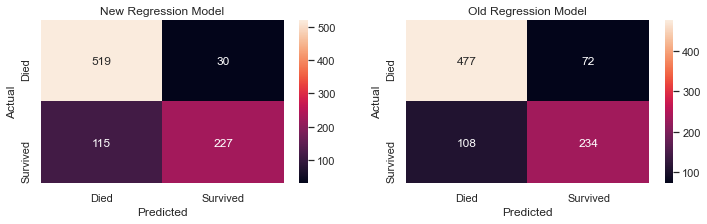

In [63]:
#Plotting Confusion Matrices
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
print(classification_report(ytrain3, y_pred_train3_knn_opto))
matrix = confusion_matrix(ytrain3, y_pred_train3_knn_opto)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('New Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,2,2)
print(classification_report(ytrain, ytrn_pred))
matrix = confusion_matrix(ytrain, ytrn_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Old Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [64]:
#Create a dataframe with the train and test accuracies for the best model.  Specify model name and input data.
KNNframe = pd.DataFrame(resultsKNN.loc[optimizedKNN.best_index_]).T
KNNframe['Name'] = 'Best KNN'
KNNframe['Input'] = "xtrain3_ss"
KNNframe = KNNframe.set_index('Name')
KNNframe['True Surv.'] = confusion_matrix(ytrain3, y_pred_train3_knn_opto)[1,1]
KNNframe['True Death'] = confusion_matrix(ytrain3, y_pred_train3_knn_opto)[0,0]
KNNframe['False Surv.'] = confusion_matrix(ytrain3, y_pred_train3_knn_opto)[0,1]
KNNframe['False Death'] = confusion_matrix(ytrain3, y_pred_train3_knn_opto)[1,0]
KNNframe['Full Data Accu.'] = optimizedKNN.best_estimator_.score(xtrain3_ss, ytrain3)
KNNframe

modframe = pd.concat([firstframe, LRframe, KNNframe])
modframe

,Validation,Train,Input,True Surv.,True Death,False Surv.,False Death,Full Data Accu.
Name,,,,,,,,
"First,LR",0.795647,0.796094,xtrain,234,477,72,108,0.797980
Best LR,0.814801,0.820599,xtrain3,249,481,68,93,0.819304
Best KNN,0.819527,0.834724,xtrain3_ss,227,519,30,115,0.837262


###  OBSERVATIONS:
* KNN models in general appear to have far few false positives than the logistic regression model
* One advantage of the logistic regression model is that it produces slightly fewer false negatives

### 2.3.5 - KNN, Coarse Optimization, with Continuous Imputed Age Data

Impute missing age data with a value and determine impacts on accuracy.  Here a value of 1000 is chosen for the following reasons:
* First, a number must be entered as the model likely cannot run with NaN (null) values
* There are so many null values for the age variable that imputing a realistic value seems as though it could be misleading.
* 1000 is chosen as a way to make it clear that these passengers did not have age data originally.  The initial concern that this addresses is that by putting a realistic age number in the data set, the model would have a hard time analyzing the impact of the real age data.  So by including a number that was unrealistically large, perhaps it would treat them separately.
* Some iterations were performed (performed independently, but not included in this analysis) and the imputed age used seemed to have minimal if any effect on the model.

In [65]:
X = xtrain3.copy()
X = X.drop(columns = ['Young'])
X['Age']=datatrn.Age
X = X.fillna(value=1000)
X

,Pclass,SibSp,Parch,Cabin_data,Sex_male,Embarked_Q,Embarked_S,Age
0,3,1,0,0,1,0,1,22.0
1,1,1,0,1,0,0,0,38.0
2,3,0,0,0,0,0,1,26.0
3,1,1,0,1,0,0,1,35.0
4,3,0,0,0,1,0,1,35.0
...,...,...,...,...,...,...,...,...
886,2,0,0,0,1,0,1,27.0
887,1,0,0,1,0,0,1,19.0
888,3,1,2,0,0,0,1,1000.0
889,1,0,0,1,1,0,0,26.0


In [66]:
Xss = ss.fit_transform(X)

In [67]:
shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)

paragridKNN = [
    {'n_neighbors' : range(7,15),
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform', 'distance'],
    'p' : [1,2,3],
    'leaf_size' : [20, 30, 50]}
]

#Fitting knn on training data
optiparaKNN = GridSearchCV(KNeighborsClassifier(), param_grid = paragridKNN, cv = shuff, verbose=True, n_jobs=-1, return_train_score = True)

#knn.fit(x_train3_new, y_train3_new)
#Now crreate a new function with the input training and validation data
optimizedKNN = optiparaKNN.fit(Xss, ytrain3)

test_results_KNN = optimizedKNN.cv_results_['mean_test_score']
train_results_KNN = optimizedKNN.cv_results_['mean_train_score']

resultsKNN = pd.DataFrame()
resultsKNN = pd.DataFrame(optimizedKNN.cv_results_['mean_test_score'])
resultsKNN.columns=['Validation']
trainyKNN = pd.DataFrame(optimizedKNN.cv_results_['mean_train_score'])
resultsKNN['Train'] = trainyKNN
resultsKNN.describe()

Fitting 30 folds for each of 432 candidates, totalling 12960 fits


,Validation,Train
count,432.000000,432.000000
mean,0.791330,0.887631
std,0.006980,0.065988
min,0.782338,0.809524
25%,0.785199,0.822659
50%,0.788308,0.891814
75%,0.797637,0.953291
max,0.804975,0.954628


In [68]:
mod_para = optimizedKNN.best_estimator_.get_params()
mod_para = pd.DataFrame(mod_para, index=['Values'])
mod_para.T

,Values
algorithm,kd_tree
leaf_size,20
metric,minkowski
metric_params,None
n_jobs,None
n_neighbors,12
p,1
weights,uniform


### 2.3.6 - KNN, Fine Tuning, with Continuous Imputed Age Data

In [69]:
shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)

paragridKNN = [
    {'n_neighbors' : range(8,13),
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform', 'distance'],
    'p' : [1,2,3],
    'leaf_size' : [15, 20, 25]}
]

#Fitting knn on training data
optiparaKNN = GridSearchCV(KNeighborsClassifier(), param_grid = paragridKNN, cv = shuff, verbose=True, n_jobs=-1, return_train_score = True)

#knn.fit(x_train3_new, y_train3_new)
#Now crreate a new function with the input training and validation data
optimizedKNN = optiparaKNN.fit(Xss, ytrain3)

test_results_KNN = optimizedKNN.cv_results_['mean_test_score']
train_results_KNN = optimizedKNN.cv_results_['mean_train_score']

resultsKNN = pd.DataFrame()
resultsKNN = pd.DataFrame(optimizedKNN.cv_results_['mean_test_score'])
resultsKNN.columns=['Validation']
trainyKNN = pd.DataFrame(optimizedKNN.cv_results_['mean_train_score'])
resultsKNN['Train'] = trainyKNN
resultsKNN.describe()

Fitting 30 folds for each of 270 candidates, totalling 8100 fits


,Validation,Train
count,270.000000,270.000000
mean,0.791505,0.888120
std,0.006917,0.065512
min,0.782711,0.812841
25%,0.785323,0.823596
50%,0.789117,0.891974
75%,0.798228,0.953291
max,0.805224,0.954628


In [70]:
mod_para = optimizedKNN.best_estimator_.get_params()
mod_para = pd.DataFrame(mod_para, index=['Values'])
mod_para.T

,Values
algorithm,kd_tree
leaf_size,15
metric,minkowski
metric_params,None
n_jobs,None
n_neighbors,12
p,1
weights,uniform


### 2.3.7 KNN, Best Model Results, with Continuous Imputed Age Data

In [71]:
#Import and fit best model from Fine Tuning, and run on FULL data set
optimizedKNN.best_estimator_.fit(Xss, ytrain3)

#Predict outcomes for FULL data set
y_pred_train3_knn_opto = optimizedKNN.best_estimator_.predict(Xss)

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       549
           1       0.85      0.64      0.73       342

    accuracy                           0.82       891
   macro avg       0.83      0.79      0.80       891
weighted avg       0.82      0.82      0.81       891

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



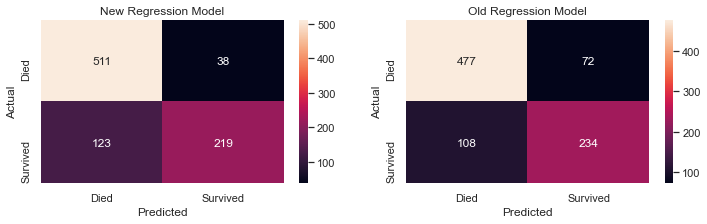

In [72]:
#Plotting Confusion Matrices
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
print(classification_report(ytrain3, y_pred_train3_knn_opto))
matrix = confusion_matrix(ytrain3, y_pred_train3_knn_opto)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('New Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,2,2)
print(classification_report(ytrain, ytrn_pred))
matrix = confusion_matrix(ytrain, ytrn_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Old Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [73]:
#Create a dataframe with the train and test accuracies for the best model.  Specify model name and input data.
KNNframe_age = pd.DataFrame(resultsKNN.loc[optimizedKNN.best_index_]).T
KNNframe_age['Name'] = 'Best KNN_Age'
KNNframe_age['Input'] = "Xss"
KNNframe_age = KNNframe_age.set_index('Name')
KNNframe_age['True Surv.'] = confusion_matrix(ytrain3, y_pred_train3_knn_opto)[1,1]
KNNframe_age['True Death'] = confusion_matrix(ytrain3, y_pred_train3_knn_opto)[0,0]
KNNframe_age['False Surv.'] = confusion_matrix(ytrain3, y_pred_train3_knn_opto)[0,1]
KNNframe_age['False Death'] = confusion_matrix(ytrain3, y_pred_train3_knn_opto)[1,0]
KNNframe_age['Full Data Accu.'] = optimizedKNN.best_estimator_.score(Xss, ytrain3)
KNNframe_age

modframe = pd.concat([firstframe, LRframe, KNNframe, KNNframe_age])
modframe

,Validation,Train,Input,True Surv.,True Death,False Surv.,False Death,Full Data Accu.
Name,,,,,,,,
"First,LR",0.795647,0.796094,xtrain,234,477,72,108,0.797980
Best LR,0.814801,0.820599,xtrain3,249,481,68,93,0.819304
Best KNN,0.819527,0.834724,xtrain3_ss,227,519,30,115,0.837262
Best KNN_Age,0.805224,0.820706,Xss,219,511,38,123,0.819304


### OBSERVATIONS:
* Overall, the KNN model has better accuracy, but in comparison to the LR models tends to predict more deaths, both true and false.
* The imputed age data seems to have a negative effect on the KNN model accuracy.

## 2.4 - Decision Tree Classifier

### 2.4.1 - Decision Tree, Default Model

In [74]:
#Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state=10)

d_tree.fit(X, ytrain3)

y_pred_traintree = d_tree.predict(X)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       549
           1       0.98      0.88      0.93       342

    accuracy                           0.95       891
   macro avg       0.95      0.93      0.94       891
weighted avg       0.95      0.95      0.95       891

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



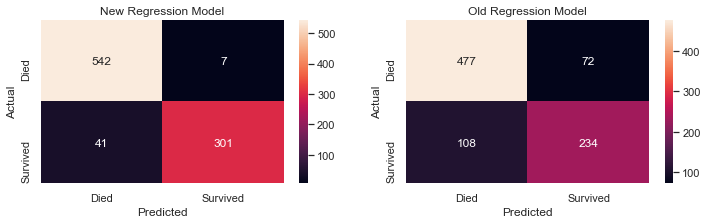

In [75]:
#Plotting Confusion Matrices
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
print(classification_report(ytrain3, y_pred_traintree))
matrix = confusion_matrix(ytrain3, y_pred_traintree)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('New Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,2,2)
print(classification_report(ytrain, ytrn_pred))
matrix = confusion_matrix(ytrain, ytrn_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Old Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

### OBSERVATIONS:
* While these initial results are the best yet, the model must be run against derived train/test data sets to prevent over-fitting

### 2.4.2 - Decision Tree, Coarse Optimization

In [76]:
mxdpth = [*range(4,16)]
mxdpth.append('None')

max_leaf_nodes = [*range(8, 104, 8)]
max_leaf_nodes.append('None')


paragridDT = [
    {'criterion' : ['gini', 'entropy'],
     'splitter' : ['best', 'random'],
     'min_samples_split' : range(2,10,2),
     'max_depth' : mxdpth,
     'min_samples_leaf' : range(1,10),
     'max_leaf_nodes' : max_leaf_nodes,
    }
]

#      'max_depth' : mxdpth,
#      'min_samples_split' : range(2,10,2),
#      'min_samples_leaf' : max_leaf_nodes,

shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)
ss = StandardScaler()

    #lass sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
    #  min_samples_leaf=1, max_features=None, max_leaf_nodes=None, 

d_tree = DecisionTreeClassifier(random_state=1)

#let us scale the data
x_train3_DT = ss.fit_transform(X)  #fit_transform the training data

#Fitting the decision tree classifier on the training data
optoparaDT =  GridSearchCV(DecisionTreeClassifier(), param_grid = paragridDT, cv = shuff, verbose=True, n_jobs=-1, return_train_score = True)

#Fitting Decision Tree on the training data
optimizedDT = optoparaDT.fit(x_train3_DT, ytrain3)

print(optimizedDT.best_estimator_.score(x_train3_DT, ytrain3))

test_results = optimizedDT.cv_results_['mean_test_score']
train_results = optimizedDT.cv_results_['mean_train_score']

Fitting 30 folds for each of 24336 candidates, totalling 730080 fits
0.8462401795735129


In [77]:
resultsDT = pd.DataFrame()
resultsDT = pd.DataFrame(optimizedDT.cv_results_['mean_test_score'])
resultsDT.columns=['Validation']
trainy = pd.DataFrame(optimizedDT.cv_results_['mean_train_score'])
resultsDT['Train'] = trainy
resultsDT.describe()

,Validation,Train
count,20736.000000,20736.000000
mean,0.804010,0.840487
std,0.005388,0.021045
min,0.782463,0.809470
25%,0.800124,0.822418
50%,0.804478,0.836624
75%,0.807960,0.853933
max,0.815920,0.932156


In [78]:
mod_para = optimizedDT.best_estimator_.get_params()
mod_para = pd.DataFrame(mod_para, index=['Values'])
mod_para.T

,Values
ccp_alpha,0
class_weight,None
criterion,entropy
max_depth,5
max_features,None
max_leaf_nodes,56
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,2
min_samples_split,2


####  It should be noted that likely, limiting the minimum number of samples per leaf does much to minimize over-fitting of the model.  Another iteration can be run for small variations of the model parameters around the best model above.  Target parameters (if not noted will be kept as default):

### 2.4.3 - Decision Tree, Fine Tuning

In [79]:
mxdpth = [*range(4,11)]

paragridDT = [
    {'criterion' : ['gini', 'entropy'],
     'splitter' : ['best', 'random'],
     'min_samples_split' : [2],
     'max_depth' : mxdpth,
     'min_samples_leaf' : range(2,11),
     'max_leaf_nodes' : range(82, 95, 6),
    }
]

#      'max_depth' : mxdpth,
#      'min_samples_split' : range(2,10,2),
#      'min_samples_leaf' : max_leaf_nodes,

shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)
ss = StandardScaler()

    #lass sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
    #  min_samples_leaf=1, max_features=None, max_leaf_nodes=None, 

d_tree = DecisionTreeClassifier(random_state=1)

#let us scale the data
x_train3_DT = ss.fit_transform(X)  #fit_transform the training data

#Fitting the decision tree classifier on the training data
optoparaDT =  GridSearchCV(DecisionTreeClassifier(), param_grid = paragridDT, cv = shuff, verbose=True, n_jobs=-1, return_train_score = True)

#Fitting Decision Tree on the training data
optimizedDT = optoparaDT.fit(x_train3_DT, ytrain3)

print(optimizedDT.best_estimator_.score(x_train3_DT, ytrain3))

test_results = optimizedDT.cv_results_['mean_test_score']
train_results = optimizedDT.cv_results_['mean_train_score']

Fitting 30 folds for each of 756 candidates, totalling 22680 fits
0.8462401795735129


In [80]:
resultsDT = pd.DataFrame()
resultsDT = pd.DataFrame(optimizedDT.cv_results_['mean_test_score'])
resultsDT.columns=['Validation']
trainy = pd.DataFrame(optimizedDT.cv_results_['mean_train_score'])
resultsDT['Train'] = trainy
resultsDT.describe()

,Validation,Train
count,756.000000,756.000000
mean,0.804100,0.837776
std,0.004568,0.018612
min,0.787562,0.812092
25%,0.801213,0.820746
50%,0.804602,0.833654
75%,0.807090,0.850415
max,0.815299,0.889567


In [81]:
mod_para = optimizedDT.best_estimator_.get_params()
mod_para = pd.DataFrame(mod_para, index=['Values'])
mod_para.T

,Values
ccp_alpha,0
class_weight,None
criterion,entropy
max_depth,5
max_features,None
max_leaf_nodes,82
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,4
min_samples_split,2


### 2.4.4 - Decision Tree, Best Model Performance

In [82]:
#Import and fit best model from Fine Tuning, and run on FULL data set
optimizedDT.best_estimator_.fit(X, ytrain3)

#Predict outcomes for FULL data set
y_pred_traintree = optimizedDT.best_estimator_.predict(X)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       549
           1       0.82      0.76      0.79       342

    accuracy                           0.85       891
   macro avg       0.84      0.83      0.84       891
weighted avg       0.85      0.85      0.85       891

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



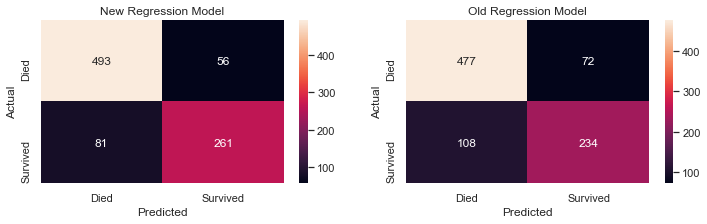

In [83]:
#Plotting Confusion Matrices
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
print(classification_report(ytrain3, y_pred_traintree))
matrix = confusion_matrix(ytrain3, y_pred_traintree)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('New Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,2,2)
print(classification_report(ytrain, ytrn_pred))
matrix = confusion_matrix(ytrain, ytrn_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Old Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

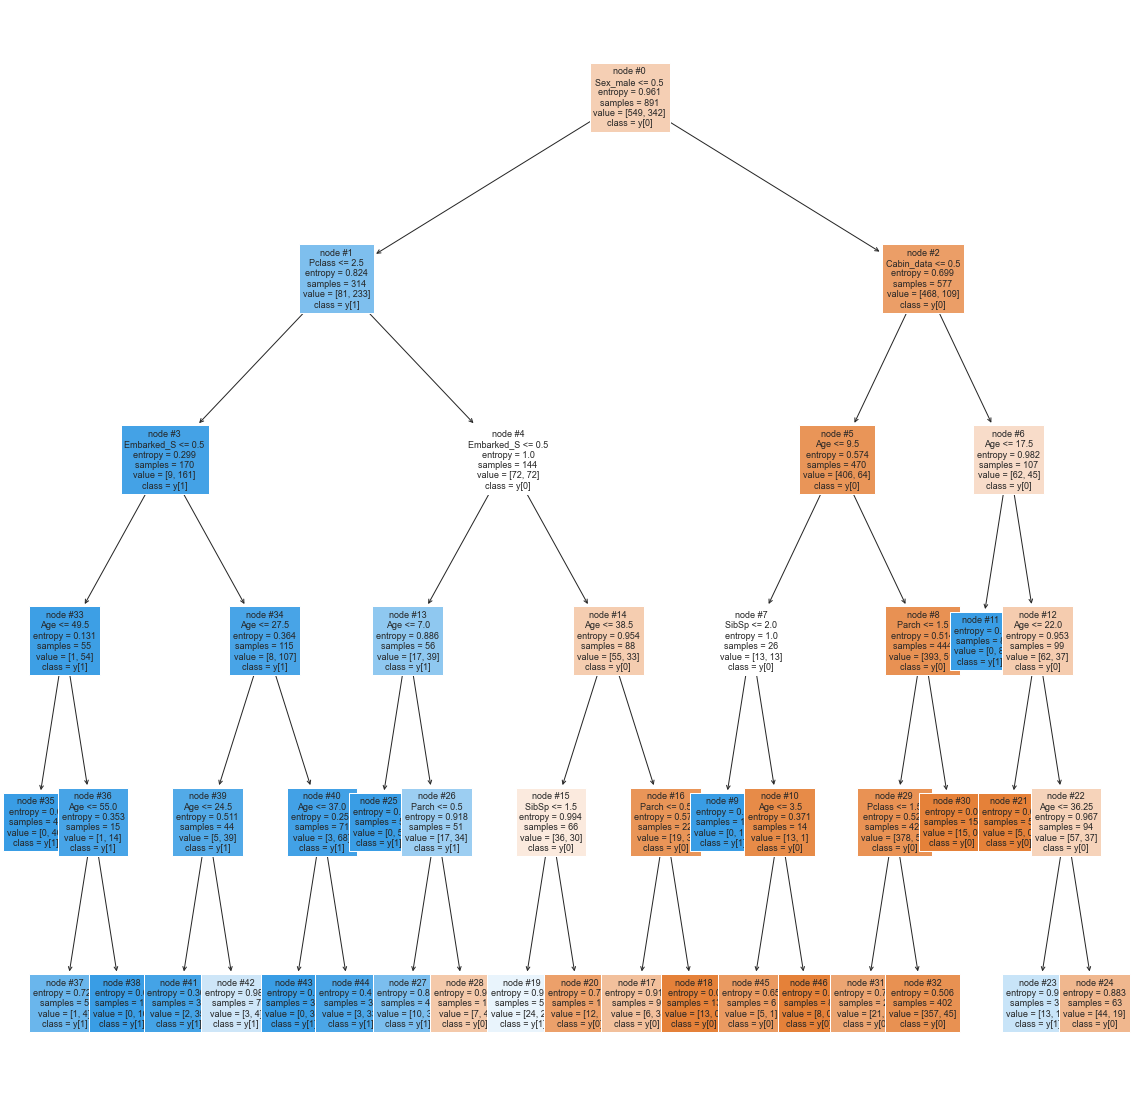

In [84]:
features = list(X.columns)
plt.figure(figsize=(20,20))
tree.plot_tree(optimizedDT.best_estimator_,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [85]:
#Create a dataframe with the train and test accuracies for the best model.  Specify model name and input data.
DTframe_age = pd.DataFrame(resultsDT.loc[optimizedDT.best_index_]).T
DTframe_age['Name'] = 'Best DT_Age'
DTframe_age['Input'] = "X"
DTframe_age = DTframe_age.set_index('Name')
DTframe_age['True Surv.'] = confusion_matrix(ytrain3, y_pred_traintree)[1,1]
DTframe_age['True Death'] = confusion_matrix(ytrain3, y_pred_traintree)[0,0]
DTframe_age['False Surv.'] = confusion_matrix(ytrain3, y_pred_traintree)[0,1]
DTframe_age['False Death'] = confusion_matrix(ytrain3, y_pred_traintree)[1,0]
DTframe_age['Full Data Accu.'] = optimizedDT.best_estimator_.score(X, ytrain3)
DTframe_age

modframe = pd.concat([firstframe, LRframe, KNNframe, KNNframe_age, DTframe_age])
modframe

,Validation,Train,Input,True Surv.,True Death,False Surv.,False Death,Full Data Accu.
Name,,,,,,,,
"First,LR",0.795647,0.796094,xtrain,234,477,72,108,0.797980
Best LR,0.814801,0.820599,xtrain3,249,481,68,93,0.819304
Best KNN,0.819527,0.834724,xtrain3_ss,227,519,30,115,0.837262
Best KNN_Age,0.805224,0.820706,Xss,219,511,38,123,0.819304
Best DT_Age,0.815299,0.846014,X,261,493,56,81,0.846240


### OBSERVATIONS:
* When looking at the Test data sets, the decision tree classifier is not quite as good as the Best KNN model, but better than the Best KNN Model with continuous imputed age data
* It should be noted that the full data accuracy is the best, though this could be result of over-fitting on the entire training data set.
* The decision tree model errors seem to be a bit better balanced than the KNN models as there is not such disproportionate discrepancy between false deaths and false survivals

## 2.5 - Random Forest Classifier

### 2.5.1 - Random Forest, Default Model

In [86]:
rfc = RandomForestClassifier(
    n_estimators=100,
    criterion='gini', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=True, 
    n_jobs=None, 
    random_state=None, 
    verbose=0, 
    warm_start=False, 
    class_weight=None, 
    ccp_alpha=0.0, 
    max_samples=None)

In [87]:
rfc.fit(X, ytrain3)
rfc_pred = rfc.predict(X)

In [88]:
rfc.oob_score_

0.792368125701459

In [89]:
rfc.score(X, ytrain3)

0.9461279461279462

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       549
           1       0.97      0.89      0.93       342

    accuracy                           0.95       891
   macro avg       0.95      0.94      0.94       891
weighted avg       0.95      0.95      0.95       891

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



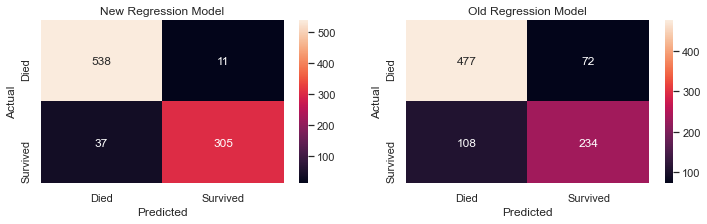

In [90]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
print(classification_report(ytrain3, rfc_pred))
matrix = confusion_matrix(ytrain3, rfc_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('New Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,2,2)
print(classification_report(ytrain, ytrn_pred))
matrix = confusion_matrix(ytrain, ytrn_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Old Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

### 2.5.1.1 - Run Default Random Forest Classifier on 30 Train/Test Splits

In [91]:
paragridRFC = [{}]

shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)
ss = StandardScaler()

rfc = RandomForestClassifier(
    n_estimators=100,
    criterion='gini', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=True, 
    n_jobs=None, 
    random_state=None, 
    verbose=0, 
    warm_start=False, 
    class_weight=None, 
    ccp_alpha=0.0, 
    max_samples=None)

x_train3_RFC = ss.fit_transform(X)  #fit_transform the training data

optoparaRFC = GridSearchCV(estimator = RandomForestClassifier(), param_grid = paragridRFC, n_jobs=-1, cv=shuff, return_train_score = True)

optimizedRFC = optoparaRFC.fit(x_train3_RFC, ytrain3)

# optimizedRFC.cv_results_
test_results_RFC = optimizedRFC.cv_results_['mean_test_score']
train_results_RFC = optimizedRFC.cv_results_['mean_train_score']

In [92]:
print(test_results_RFC)
print(train_results_RFC)

[0.79291045]
[0.95329053]


### OBSERVATIONS:
* The discrepancy between the train and test data sets is rather large.
* The next step should aim to tighten some of the decision tree parameters to see if these numbers can be brought closer together.  A good place to start would be using a range of values similar to the second decision tree optimization step from the previous section.

### 2.5.2 - Random Forrest, Coarse Optimization

In [93]:
mxdpth = [*range(10,21,5)]

paragridRFC = [
    {'criterion' : ['gini', 'entropy'],
     'min_samples_split' : [2],
     'max_depth' : mxdpth,
     'min_samples_leaf' : range(1,12,5),
     'max_leaf_nodes' : range(50, 91,10)   
    }
]

shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)

ss = StandardScaler()

#REMAINING CRITERIA NOT SPECIFIED IN PARAGRID
rfc = RandomForestClassifier(
    n_estimators=100,
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=True, 
    n_jobs=-1, 
    random_state=None, 
    verbose=0, 
    warm_start=False, 
    class_weight=None, 
    ccp_alpha=0.0, 
    max_samples=None)

x_train3_RFC = ss.fit_transform(X)  #fit_transform the training data

optoparaRFC = GridSearchCV(estimator = RandomForestClassifier(), param_grid = paragridRFC, n_jobs=-1, cv=shuff, return_train_score = True, verbose=True)

optimizedRFC = optoparaRFC.fit(x_train3_RFC, ytrain3)

# optimizedRFC.cv_results_

test_results_RFC = optimizedRFC.cv_results_['mean_test_score']
train_results_RFC = optimizedRFC.cv_results_['mean_train_score']


Fitting 30 folds for each of 90 candidates, totalling 2700 fits


In [94]:
resultsRFC = pd.DataFrame()
resultsRFC = pd.DataFrame(optimizedRFC.cv_results_['mean_test_score'])
resultsRFC.columns=['Validation']
trainyRFC = pd.DataFrame(optimizedRFC.cv_results_['mean_train_score'])
resultsRFC['Train'] = trainyRFC
resultsRFC.describe()

,Validation,Train
count,90.000000,90.000000
mean,0.817254,0.869603
std,0.005969,0.036006
min,0.802488,0.838095
25%,0.811381,0.839674
50%,0.820149,0.850562
75%,0.821859,0.910300
max,0.823881,0.938309


In [95]:
mod_para = optimizedRFC.best_estimator_.get_params()
mod_para = pd.DataFrame(mod_para, index=['Values'])
mod_para.T

,Values
bootstrap,True
ccp_alpha,0
class_weight,None
criterion,gini
max_depth,20
max_features,auto
max_leaf_nodes,70
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


### 2.5.3 - Random Forrest, Coarse Optimization, Second Iteration

In [96]:
mxdpth = [*range(12,19,3)]

paragridRFC = [
    {'criterion' : ['gini'],
     'min_samples_split' : [2],
     'max_depth' : mxdpth,
     'min_samples_leaf' : range(3,12,5),
     'max_leaf_nodes' : range(85,96,5)   
    }
]

shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)

#REMAINING CRITERIA NOT SPECIFIED IN PARAGRID
rfc = RandomForestClassifier(
    n_estimators=100,
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=True, 
    n_jobs=-1, 
    random_state=None, 
    verbose=0, 
    warm_start=False, 
    class_weight=None, 
    ccp_alpha=0.0, 
    max_samples=None)

x_train3_RFC = ss.fit_transform(X)  #fit_transform the training data

optoparaRFC = GridSearchCV(estimator = RandomForestClassifier(), param_grid = paragridRFC, n_jobs=-1, cv=shuff, return_train_score = True, verbose=True)

optimizedRFC = optoparaRFC.fit(x_train3_RFC, ytrain3)

# optimizedRFC.cv_results_

test_results_RFC = optimizedRFC.cv_results_['mean_test_score']
train_results_RFC = optimizedRFC.cv_results_['mean_train_score']


Fitting 30 folds for each of 18 candidates, totalling 540 fits


In [97]:
resultsRFC = pd.DataFrame()
resultsRFC = pd.DataFrame(optimizedRFC.cv_results_['mean_test_score'])
resultsRFC.columns=['Validation']
trainyRFC = pd.DataFrame(optimizedRFC.cv_results_['mean_train_score'])
resultsRFC['Train'] = trainyRFC
resultsRFC.describe()

,Validation,Train
count,18.000000,18.000000
mean,0.819866,0.856765
std,0.002383,0.011870
min,0.815796,0.844248
25%,0.818315,0.845358
50%,0.819776,0.857036
75%,0.821393,0.867911
max,0.824627,0.869288


In [98]:
mod_para = optimizedRFC.best_estimator_.get_params()
mod_para = pd.DataFrame(mod_para, index=['Values'])
mod_para.T

,Values
bootstrap,True
ccp_alpha,0
class_weight,None
criterion,gini
max_depth,18
max_features,auto
max_leaf_nodes,95
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


### 2.5.4 - Random Forrest, Fine Tuning

In [99]:
mxdpth = [*range(14,17,1)]

paragridRFC = [
    {'criterion' : ['gini'],
     'min_samples_split' : [2],
     'max_depth' : mxdpth,
     'min_samples_leaf' : range(5,11,2),
     'max_leaf_nodes' : range(75, 86,5)   
    }
]

shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)

rfc = RandomForestClassifier(
    n_estimators=100,
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=True, 
    n_jobs=-1, 
    random_state=0, 
    verbose=0, 
    warm_start=False, 
    class_weight=None, 
    ccp_alpha=0.0, 
    max_samples=None)

x_train3_RFC = ss.fit_transform(X)  #fit_transform the training data

optoparaRFC = GridSearchCV(estimator = RandomForestClassifier(), param_grid = paragridRFC, n_jobs=-1, cv=shuff, return_train_score = True, verbose=True)

optimizedRFC = optoparaRFC.fit(x_train3_RFC, ytrain3)

# optimizedRFC.cv_results_

test_results_RFC = optimizedRFC.cv_results_['mean_test_score']
train_results_RFC = optimizedRFC.cv_results_['mean_train_score']

resultsRFC = pd.DataFrame()
resultsRFC = pd.DataFrame(optimizedRFC.cv_results_['mean_test_score'])
resultsRFC.columns=['Validation']
trainyRFC = pd.DataFrame(optimizedRFC.cv_results_['mean_train_score'])
resultsRFC['Train'] = trainyRFC
resultsRFC.describe()

Fitting 30 folds for each of 27 candidates, totalling 810 fits


,Validation,Train
count,27.000000,27.000000
mean,0.821550,0.848204
std,0.001216,0.004788
min,0.819279,0.842215
25%,0.820585,0.843178
50%,0.821642,0.847459
75%,0.822201,0.853826
max,0.824378,0.855110


In [100]:
mod_para = optimizedRFC.best_estimator_.get_params()
mod_para = pd.DataFrame(mod_para, index=['Values'])
mod_para.T

,Values
bootstrap,True
ccp_alpha,0
class_weight,None
criterion,gini
max_depth,15
max_features,auto
max_leaf_nodes,75
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


### 2.5.5 - Random Forrest, Fine Tuning, N-Estimators Tuning

In [101]:
paragridRFC = [
    {'criterion' : ['gini'],
     'min_samples_split' : [2],
     'max_depth' : [15],
     'min_samples_leaf' : [7],
     'max_leaf_nodes' : [85],
     'n_estimators' :[50, 100, 200, 500]
    }
]


shuff = ShuffleSplit(n_splits=30, test_size=0.3, random_state = 0)

rfc = RandomForestClassifier(
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=True, 
    n_jobs=-1, 
    random_state=0, 
    verbose=0, 
    warm_start=False, 
    class_weight=0, 
    ccp_alpha=0.0, 
    max_samples=None)

x_train3_RFC = ss.fit_transform(X)  #fit_transform the training data

optoparaRFC = GridSearchCV(estimator = RandomForestClassifier(), param_grid = paragridRFC, n_jobs=-1, cv=shuff, return_train_score = True, verbose=True)

optimizedRFC = optoparaRFC.fit(x_train3_RFC, ytrain3)

# optimizedRFC.cv_results_

test_results_RFC = optimizedRFC.cv_results_['mean_test_score']
train_results_RFC = optimizedRFC.cv_results_['mean_train_score']

resultsRFC = pd.DataFrame()
resultsRFC = pd.DataFrame(optimizedRFC.cv_results_['mean_test_score'])
resultsRFC.columns=['Validation']
trainyRFC = pd.DataFrame(optimizedRFC.cv_results_['mean_train_score'])
resultsRFC['Train'] = trainyRFC
resultsRFC.describe()

Fitting 30 folds for each of 4 candidates, totalling 120 fits


,Validation,Train
count,4.000000,4.000000
mean,0.822388,0.847325
std,0.001089,0.000451
min,0.821269,0.846816
25%,0.821922,0.847017
50%,0.822201,0.847352
75%,0.822668,0.847659
max,0.823881,0.847780


In [102]:
mod_para = optimizedRFC.best_estimator_.get_params()
mod_para = pd.DataFrame(mod_para, index=['Values'])
mod_para.T

,Values
bootstrap,True
ccp_alpha,0
class_weight,None
criterion,gini
max_depth,15
max_features,auto
max_leaf_nodes,85
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


### 2.5.6 - Random Forest, Best Model Performance

In [103]:
optimizedRFC.best_estimator_.fit(X, ytrain3)
rfc_pred = optimizedRFC.best_estimator_.predict(X)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       549
           1       0.86      0.72      0.78       342

    accuracy                           0.85       891
   macro avg       0.85      0.82      0.83       891
weighted avg       0.85      0.85      0.84       891

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



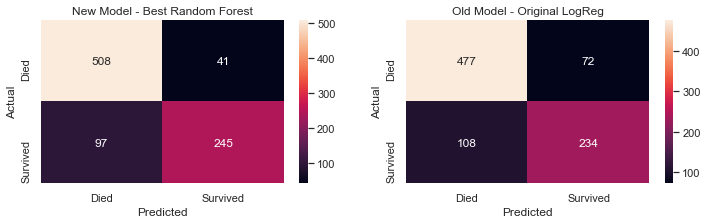

In [104]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
print(classification_report(ytrain3, rfc_pred))
matrix = confusion_matrix(ytrain3, rfc_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('New Model - Best Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,2,2)
print(classification_report(ytrain, ytrn_pred))
matrix = confusion_matrix(ytrain, ytrn_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Old Model - Original LogReg')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [105]:
#Create a dataframe with the train and test accuracies for the best model.  Specify model name and input data.
RFCframe_age = pd.DataFrame(resultsRFC.loc[optimizedRFC.best_index_]).T
RFCframe_age['Name'] = 'Best RFC_Age'
RFCframe_age['Input'] = "X"
RFCframe_age = RFCframe_age.set_index('Name')
RFCframe_age['True Surv.'] = confusion_matrix(ytrain3, rfc_pred)[1,1]
RFCframe_age['True Death'] = confusion_matrix(ytrain3, rfc_pred)[0,0]
RFCframe_age['False Surv.'] = confusion_matrix(ytrain3, rfc_pred)[0,1]
RFCframe_age['False Death'] = confusion_matrix(ytrain3, rfc_pred)[1,0]
RFCframe_age['Full Data Accu.'] = optimizedRFC.best_estimator_.score(X, ytrain3)
RFCframe_age

modframe = pd.concat([firstframe, LRframe, KNNframe, KNNframe_age, DTframe_age, RFCframe_age])
modframe

,Validation,Train,Input,True Surv.,True Death,False Surv.,False Death,Full Data Accu.
Name,,,,,,,,
"First,LR",0.795647,0.796094,xtrain,234,477,72,108,0.797980
Best LR,0.814801,0.820599,xtrain3,249,481,68,93,0.819304
Best KNN,0.819527,0.834724,xtrain3_ss,227,519,30,115,0.837262
Best KNN_Age,0.805224,0.820706,Xss,219,511,38,123,0.819304
Best DT_Age,0.815299,0.846014,X,261,493,56,81,0.846240
Best RFC_Age,0.823881,0.847084,X,245,508,41,97,0.845118


### OBSERVATIONS:
* The Random Forest Classifier, is an improvement over both the decision tree and KNN models.

## 2.6 - Re-Running Models To Unify Training Data Sets
In this section, previous models (Decision Tree and Random Forrest) are run with the xtrain3 data which does NOT have imputed age data.  This will provide a quick comparison to determine if the data set which produced better results for the KNN model will also improve the decision tree and RF classifiers.

### 2.6.1 - Re-run Best DT Model with 'xtrain3'

In [106]:
#Import and fit best model from Fine Tuning, and run on FULL data set
optimizedDT.best_estimator_.fit(xtrain3, ytrain3)

#Predict outcomes for FULL data set
y_pred_traintree = optimizedDT.best_estimator_.predict(xtrain3)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       549
           1       0.90      0.65      0.76       342

    accuracy                           0.84       891
   macro avg       0.86      0.80      0.82       891
weighted avg       0.85      0.84      0.83       891

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



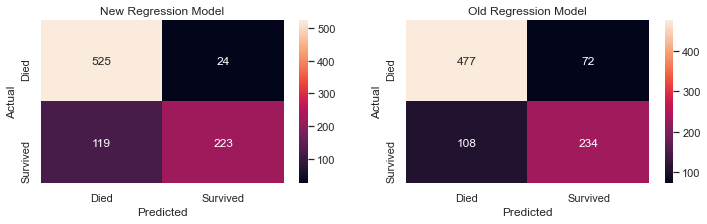

In [107]:
#Plotting Confusion Matrices
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
print(classification_report(ytrain3, y_pred_traintree))
matrix = confusion_matrix(ytrain3, y_pred_traintree)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('New Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,2,2)
print(classification_report(ytrain, ytrn_pred))
matrix = confusion_matrix(ytrain, ytrn_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Old Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [108]:
#Create a dataframe with the train and test accuracies for the best model.  Specify model name and input data.
DTframe = pd.DataFrame(resultsDT.loc[optimizedDT.best_index_]).T
DTframe['Name'] = 'Best DT'
DTframe['Input'] = "xtrain3"
DTframe = DTframe.set_index('Name')
DTframe['True Surv.'] = confusion_matrix(ytrain3, y_pred_traintree)[1,1]
DTframe['True Death'] = confusion_matrix(ytrain3, y_pred_traintree)[0,0]
DTframe['False Surv.'] = confusion_matrix(ytrain3, y_pred_traintree)[0,1]
DTframe['False Death'] = confusion_matrix(ytrain3, y_pred_traintree)[1,0]
DTframe['Full Data Accu.'] = optimizedDT.best_estimator_.score(xtrain3, ytrain3)
DTframe

modframe = pd.concat([firstframe, LRframe, KNNframe, KNNframe_age, DTframe, DTframe_age, RFCframe_age])
modframe

,Validation,Train,Input,True Surv.,True Death,False Surv.,False Death,Full Data Accu.
Name,,,,,,,,
"First,LR",0.795647,0.796094,xtrain,234,477,72,108,0.797980
Best LR,0.814801,0.820599,xtrain3,249,481,68,93,0.819304
Best KNN,0.819527,0.834724,xtrain3_ss,227,519,30,115,0.837262
Best KNN_Age,0.805224,0.820706,Xss,219,511,38,123,0.819304
Best DT,0.815299,0.846014,xtrain3,223,525,24,119,0.839506
Best DT_Age,0.815299,0.846014,X,261,493,56,81,0.846240
Best RFC_Age,0.823881,0.847084,X,245,508,41,97,0.845118


### 2.6.2 - Re-run Best RFC Model with 'xtrain3'

In [109]:
optimizedRFC.best_estimator_.fit(xtrain3, ytrain3)
rfc_pred = optimizedRFC.best_estimator_.predict(xtrain3)

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       549
           1       0.88      0.67      0.76       342

    accuracy                           0.84       891
   macro avg       0.85      0.81      0.82       891
weighted avg       0.84      0.84      0.83       891

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



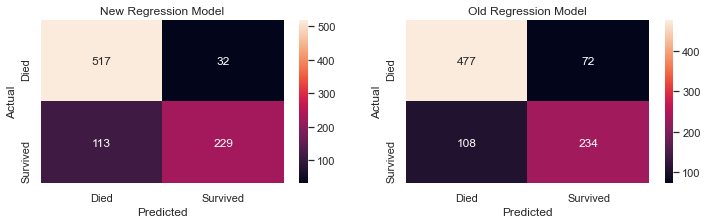

In [110]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
print(classification_report(ytrain3, rfc_pred))
matrix = confusion_matrix(ytrain3, rfc_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('New Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,2,2)
print(classification_report(ytrain, ytrn_pred))
matrix = confusion_matrix(ytrain, ytrn_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Old Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [111]:
#Create a dataframe with the train and test accuracies for the best model.  Specify model name and input data.
RFCframe = pd.DataFrame(resultsRFC.loc[optimizedRFC.best_index_]).T
RFCframe['Name'] = 'Best RFC'
RFCframe['Input'] = "xtrain3"
RFCframe = RFCframe.set_index('Name')
RFCframe['True Surv.'] = confusion_matrix(ytrain3, rfc_pred)[1,1]
RFCframe['True Death'] = confusion_matrix(ytrain3, rfc_pred)[0,0]
RFCframe['False Surv.'] = confusion_matrix(ytrain3, rfc_pred)[0,1]
RFCframe['False Death'] = confusion_matrix(ytrain3, rfc_pred)[1,0]
RFCframe['Full Data Accu.'] = optimizedRFC.best_estimator_.score(xtrain3, ytrain3)
RFCframe

modframe = pd.concat([firstframe, LRframe, KNNframe, KNNframe_age, DTframe, DTframe_age, RFCframe, RFCframe_age])
modframe

,Validation,Train,Input,True Surv.,True Death,False Surv.,False Death,Full Data Accu.
Name,,,,,,,,
"First,LR",0.795647,0.796094,xtrain,234,477,72,108,0.797980
Best LR,0.814801,0.820599,xtrain3,249,481,68,93,0.819304
Best KNN,0.819527,0.834724,xtrain3_ss,227,519,30,115,0.837262
Best KNN_Age,0.805224,0.820706,Xss,219,511,38,123,0.819304
Best DT,0.815299,0.846014,xtrain3,223,525,24,119,0.839506
Best DT_Age,0.815299,0.846014,X,261,493,56,81,0.846240
Best RFC,0.823881,0.847084,xtrain3,229,517,32,113,0.837262
Best RFC_Age,0.823881,0.847084,X,245,508,41,97,0.845118


### OBSERVATIONS:
* It appears as though the data sets with the imputed age data (X) provides the best results for the Decision Tree and Random Forest Classifier models.  It should be noted however, that these models were not run with a test train split (thus the same Test and Train averages) and further, these models were not optimized around that data set.

# 3 - Model Averaging

This section will aggregate the survival probabilities of all the passengers from all the 4 best models.  They will then be averaged as a means of attempting to obtain a holistic four-model survival prediction for the passengers.  This will of course be compared to the actual results.  This technique seeks to determine if any deficiencies in one model's ability to predict a certain passenger's survival could be compensated by the better judgment of the remaining models, yielding a more accurate prediction model.

In [112]:
#Create dataframes with the predicted probabilities from the best versions of all 4 model varieties above.
probaLR = pd.DataFrame(optimizedLR.best_estimator_.predict_proba(xtrain3))
probaLR = probaLR.drop(columns = [0])
probaLR = probaLR.rename(columns={1:'LR'})

probaKNN = pd.DataFrame(optimizedKNN.best_estimator_.predict_proba(xtrain3_ss))
probaKNN = probaKNN.drop(columns = [0])
probaKNN = probaKNN.rename(columns={1:'KNN'})

probaDT = pd.DataFrame(optimizedDT.best_estimator_.predict_proba(X))
probaDT = probaDT.drop(columns = [0])
probaDT = probaDT.rename(columns={1:'DT'})

probaRFC = pd.DataFrame(optimizedRFC.best_estimator_.predict_proba(X))
probaRFC = probaRFC.drop(columns = [0])
probaRFC = probaRFC.rename(columns={1:'RFC'})

In [113]:
#Create a single dataframe with all probabilities
allproba = pd.concat([probaLR, probaKNN, probaDT, probaRFC], axis=1)
cols = ['LR', 'KNN', 'DT', 'RFC']

#Average all probabilities to get a probability-weighted vote for each model
allproba['mean'] = allproba[cols].mean(axis=1)

#Create a new prediction for each passenger based on the average probability of each model
allproba['Survived'] = np.where(allproba['mean'] > .5, 1, 0)
allproba

,LR,KNN,DT,RFC,mean,Survived
0,0.063033,0.166667,0.833333,0.616294,0.419832,0
1,0.940091,0.416667,0.886364,0.906644,0.787441,1
2,0.635567,0.000000,0.409836,0.555893,0.400324,0
3,0.905837,0.416667,0.886364,0.892704,0.775393,1
4,0.091157,0.000000,0.833333,0.620867,0.386339,0
...,...,...,...,...,...,...
886,0.173294,0.083333,0.925000,0.795796,0.494356,0
887,0.934822,0.333333,1.000000,0.894082,0.790559,1
888,0.438769,0.333333,0.409836,0.388228,0.392542,0
889,0.573657,0.500000,1.000000,0.888001,0.740415,1


              precision    recall  f1-score   support

           0       0.80      0.79      0.80       549
           1       0.67      0.68      0.68       342

    accuracy                           0.75       891
   macro avg       0.74      0.74      0.74       891
weighted avg       0.75      0.75      0.75       891

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.68      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



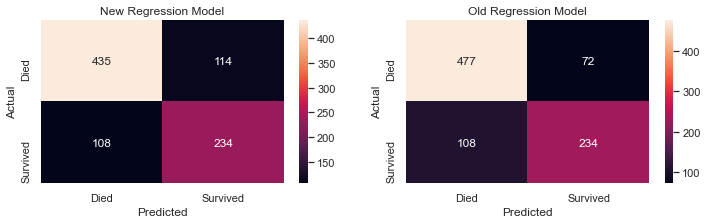

In [114]:
meanpred = allproba.Survived

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
print(classification_report(ytrain3, meanpred))
matrix = confusion_matrix(ytrain3, meanpred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('New Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,2,2)
print(classification_report(ytrain, ytrn_pred))
matrix = confusion_matrix(ytrain, ytrn_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Old Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

### OBSERVATIONS:
* Taking the average of all the predicted model probabilities did not produce a more accurate result, and in-fact was the worst performing model of them all at only 75% accuracy.

# 4 - Model Selection, Fitting and Predicting (Classifying) Test Data 

In [115]:
#Show the model performance dataframe
modframe

,Validation,Train,Input,True Surv.,True Death,False Surv.,False Death,Full Data Accu.
Name,,,,,,,,
"First,LR",0.795647,0.796094,xtrain,234,477,72,108,0.797980
Best LR,0.814801,0.820599,xtrain3,249,481,68,93,0.819304
Best KNN,0.819527,0.834724,xtrain3_ss,227,519,30,115,0.837262
Best KNN_Age,0.805224,0.820706,Xss,219,511,38,123,0.819304
Best DT,0.815299,0.846014,xtrain3,223,525,24,119,0.839506
Best DT_Age,0.815299,0.846014,X,261,493,56,81,0.846240
Best RFC,0.823881,0.847084,xtrain3,229,517,32,113,0.837262
Best RFC_Age,0.823881,0.847084,X,245,508,41,97,0.845118


## 4.1 - Model Selection

As the test data that is to be fit is unseen data, the model with the best mean accuracy against the test data sets created using shuffle split, will be selected.

Both random forest classifier models share the same mean accuracy of 82.4%, however this is because "Best RFC" was never optimized or run through a train/test split regimen.  It simply used the parameters in "Best RFC_Age" optimized against the "X" data set and ran against the entire "xtrain3" data set.  In other words, the random forest classifier has been validated against "X" ("Best RFC_Age") but not "xtrain3" ("Best RFC"), and thus more confidence will be given to "Best RFC_Age."

### The Selected Model Will Be:
* The random forest classifier set to the parameters below

## 4.2 - Test Data Preparation

### The Input Test Data Will Be Treated as Follows:
Per the "X" data set:
* Missing Age data will be imputed with the number 1000
* A binary "cabin_data" variable will be created to indicate the presence of cabin data
* Fare data will be removed from the the data
* One hot encoding will be implemented on the Sex and Embarked variables
* Name, PassengerID, and Ticket variables will be removed

In [116]:
#Load the Test Data Set
data_test = pd.read_csv("test.csv")
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [117]:
#First we need to check the data for errors and nulls:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [118]:
data_test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Enander, Mr. Ingvar",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [119]:
#Next we should very that the data are

data_test.describe(exclude = 'number')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Enander, Mr. Ingvar",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [120]:
#Check to ensure that categorical variables are similar to those previously
print("Pclass: ", pd.unique(data_test['Pclass']))
print("SibSp: ", pd.unique(data_test['SibSp']))
print("Parch: ", pd.unique(data_test['Parch']))
print("Embarked: ", pd.unique(data_test['Embarked']))

Pclass:  [3 2 1]
SibSp:  [0 1 2 3 4 5 8]
Parch:  [0 1 3 2 4 6 5 9]
Embarked:  ['Q' 'S' 'C']


### OBSERVATIONS:
* Again, there are null values for Cabin and Age
* There is also a null value in the Fare data, but this is of less of a concern as the Fare data is not utilized in this analysis
* It can also be seen that the Pclass classes and Embarked locations are the same as for the training data set
* There are however different numbers for Sibsp and Parch.  This may cause a problem as the training data did not have values as high as those in the test data set.  This could turn out to be a possible source of error.

### Preparation Steps:
* Age will be imputed as was done for the training data set
* Cabin will be removed and replaced with a binary variable indicating the presence of a cabin assignment
* Columns not used in analysis will be removed

In [121]:
#Create new data set with proper formatting and features
data_testX = data_test

#One-hot Encode Sex and Embarked Variables
data_testX = pd.get_dummies(data=data_testX, columns = ['Sex', 'Embarked'], drop_first=True)

#Make the binary cabin_data variable
data_testX['Cabin_data'] = np.where(data_testX.Cabin.isnull()==False, 1, 0)
data_testX

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Cabin_data
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,1,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,1,0,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,0,1,0
416,1308,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,1,0,1,0


In [122]:
#Impute missing age data with 1000 as done previously
data_testX['Age'].fillna(value=1000, inplace=True)
data_testX

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Cabin_data
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,1,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1000.0,0,0,A.5. 3236,8.0500,NaN,1,0,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,0,1,0
416,1308,3,"Ware, Mr. Frederick",1000.0,0,0,359309,8.0500,NaN,1,0,1,0


In [123]:
#Before the PassngerId column can be removed, its data must be copied so it can be reintegrated into the 
# prediction submission dataframe
Test_Predictions = data_testX.PassengerId.copy()

#Remove unused columns
data_testX = data_testX.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'])
data_testX

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Cabin_data
0,3,34.5,0,0,1,1,0,0
1,3,47.0,1,0,0,0,1,0
2,2,62.0,0,0,1,1,0,0
3,3,27.0,0,0,1,0,1,0
4,3,22.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
413,3,1000.0,0,0,1,0,1,0
414,1,39.0,0,0,0,0,0,1
415,3,38.5,0,0,1,0,1,0
416,3,1000.0,0,0,1,0,1,0


## 4.3 - Fitting and Predicting (Classifying) Test Data

In [124]:
#Redefine the best model parameters output previously
rfc_final = RandomForestClassifier(
    n_estimators=100,
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None, 
    random_state=None, 
    verbose=0, 
    warm_start=False, 
    class_weight=None, 
    ccp_alpha=0.0, 
    max_samples=None,
    criterion='gini',
    max_depth=15,
    max_leaf_nodes=85,
    min_impurity_split=None,
    min_samples_leaf=7,
    min_samples_split=2)

#Fit to the training data set
rfc_final.fit(X, ytrain3)

#Predict the test data from the fitted model
rfc_test_pred = rfc_final.predict(data_testX)

In [125]:
#Turn Predictions into a DataFrame
rfc_test_pred = pd.DataFrame(rfc_test_pred)
rfc_test_pred

#Turn Test_Predictions into a DataFrame
Test_Predictions = pd.DataFrame(Test_Predictions)
Test_Predictions

#Set the rfc_test_pred predictions as the Second columns of Test_Predictions
Test_Predictions['Survived'] = rfc_test_pred
Test_Predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [126]:
#Send the DataFrame to a .csv file without index values for proper formatting
Test_Predictions.to_csv('Test_Predictions.csv', index=False)

# 5 - Post-Submission Results Analysis and Examination
Since the model only performed predicted passenger survival with 70% accuracy on the test data, some investigation needs to be done to determine why the model was previously getting 82% on validated data.

#### Quickly re-run training data to verify model is not broken

In [127]:
#Redefine the best model parameters output previously
rfc_final = RandomForestClassifier(
    n_estimators=100,
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None, 
    random_state=None, 
    verbose=0, 
    warm_start=False, 
    class_weight=None, 
    ccp_alpha=0.0, 
    max_samples=None,
    criterion='gini',
    max_depth=15,
    max_leaf_nodes=85,
    min_impurity_split=None,
    min_samples_leaf=7,
    min_samples_split=2)

#Fit to the training data set
rfc_final.fit(X, ytrain3)

#Predict the test data from the fitted model
rfc_train_pred = rfc_final.predict(X)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       549
           1       0.86      0.71      0.78       342

    accuracy                           0.84       891
   macro avg       0.85      0.82      0.83       891
weighted avg       0.85      0.84      0.84       891



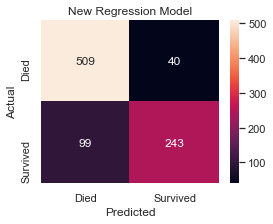

In [128]:
plt.figure(figsize=(4,3))
print(classification_report(ytrain3, rfc_train_pred))
matrix = confusion_matrix(ytrain3, rfc_train_pred)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('New Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

## 5.1 - Comparing Training and Test Data Sets
Determine if there are any major differences between the training and test data sets that would cause the prediction accuracy to be that much lower on the test data.

In [129]:
#Load the Test Data Set
data_test = pd.read_csv("test.csv")
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


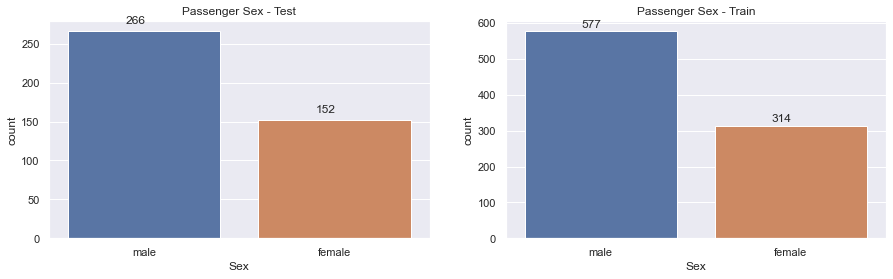

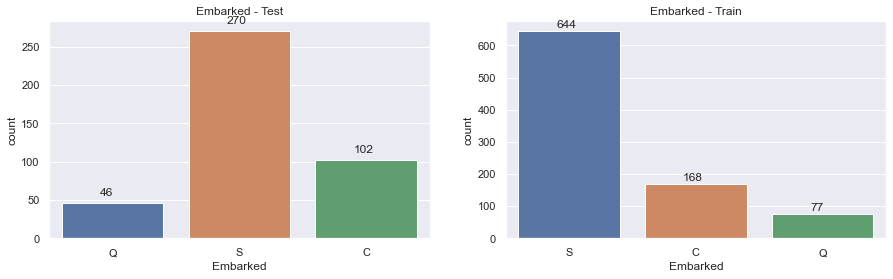

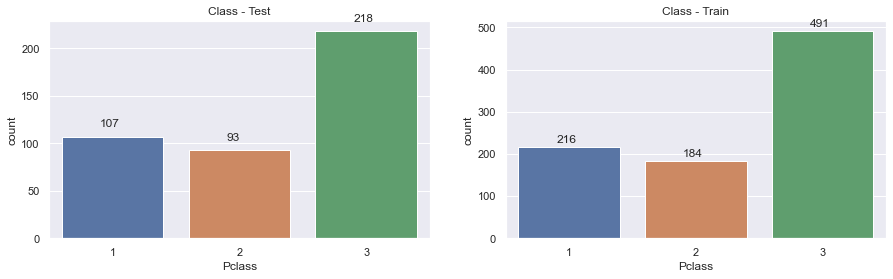

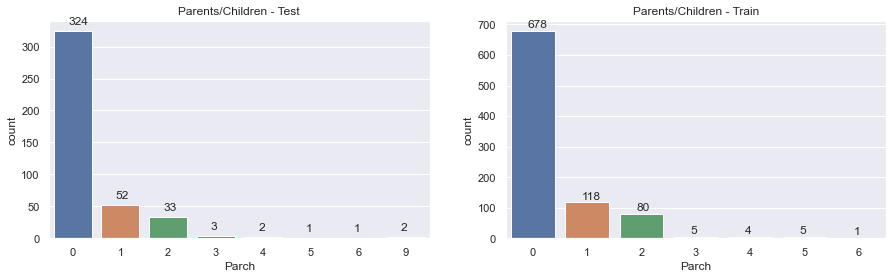

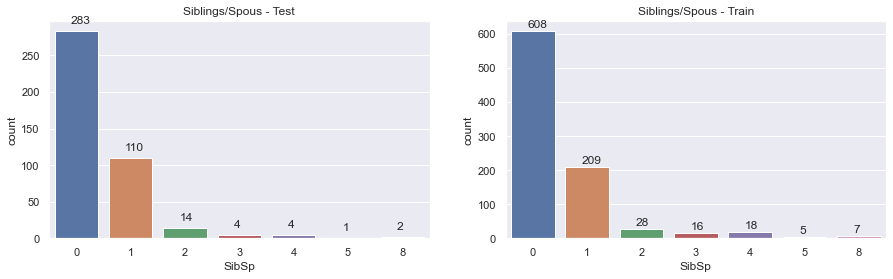

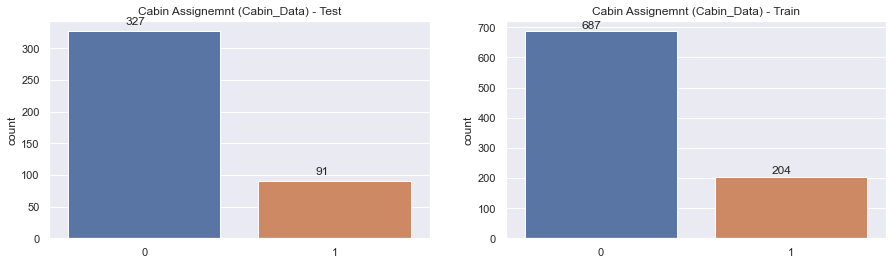

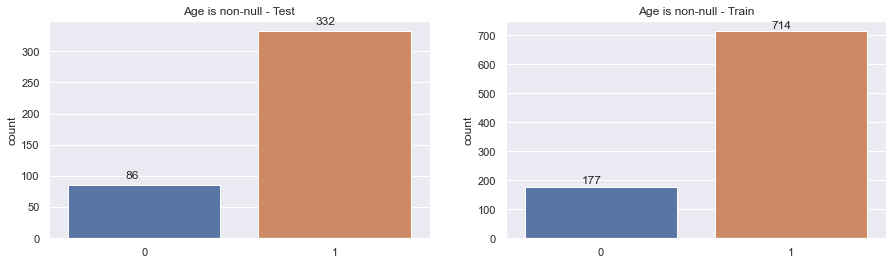

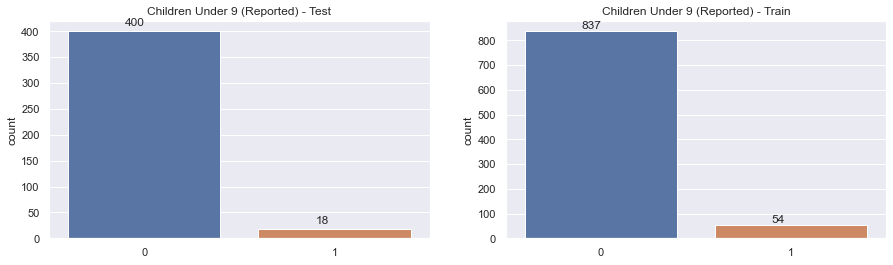

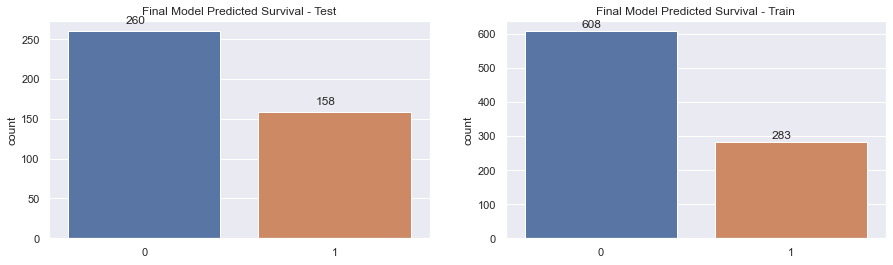

In [130]:
#Create count plots for all relevant categorical data.  Cabin is excluded due to the high number of invidiual cabins.

#Sex Plot
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Passenger Sex - Test')
ax = sns.countplot(x=data_test.Sex,)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.subplot(1,2,2)
plt.title('Passenger Sex - Train')
bx = sns.countplot(x=datatrn.Sex,)
for p in bx.patches:
    bx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

#Embarked Plot
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Embarked - Test')
ax = sns.countplot(x=data_test.Embarked,)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.subplot(1,2,2)
plt.title('Embarked - Train')
bx = sns.countplot(x=datatrn.Embarked,)
for p in bx.patches:
    bx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

#Class Plot
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Class - Test')
ax = sns.countplot(x=data_test.Pclass,)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.subplot(1,2,2)
plt.title('Class - Train')
bx = sns.countplot(x=datatrn.Pclass,)
for p in bx.patches:
    bx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

#Parent Children Plot
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Parents/Children - Test')
ax = sns.countplot(x=data_test.Parch,)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.subplot(1,2,2)
plt.title('Parents/Children - Train')
bx = sns.countplot(x=datatrn.Parch,)
for p in bx.patches:
    bx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

#Spouse Sibling Plot
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Siblings/Spous - Test')
ax = sns.countplot(x=data_test.SibSp,)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.subplot(1,2,2)
plt.title('Siblings/Spous - Train')
bx = sns.countplot(x=datatrn.SibSp,)
for p in bx.patches:
    bx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

#Cabin Plot
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Cabin Assignemnt (Cabin_Data) - Test')
ax = sns.countplot(x=np.where(data_test.Cabin.isnull()==False, 1, 0))
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.subplot(1,2,2)
plt.title('Cabin Assignemnt (Cabin_Data) - Train')
bx = sns.countplot(x=np.where(datatrn.Cabin.isnull()==False, 1, 0))
for p in bx.patches:
    bx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

#Age Plot
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Age is non-null - Test')
ax = sns.countplot(x=np.where(data_test.Age.isnull()==False, 1, 0))
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.subplot(1,2,2)
plt.title('Age is non-null - Train')
bx = sns.countplot(x=np.where(datatrn.Age.isnull()==False, 1, 0))
for p in bx.patches:
    bx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()


#Young Plot (how many passengers under the specified age are in the data set)
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Children Under 9 (Reported) - Test')
ax = sns.countplot(x=np.where(data_test.Age<9, 1, 0))
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.subplot(1,2,2)
plt.title('Children Under 9 (Reported) - Train')
bx = sns.countplot(x=np.where(datatrn.Age<9, 1, 0))
for p in bx.patches:
    bx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

#Survival Predictions
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Final Model Predicted Survival - Test')
ax = sns.countplot(x=rfc_final.predict(data_testX)) #re-runs model from 4.3 and Appendix A on test data
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.subplot(1,2,2)
plt.title('Final Model Predicted Survival - Train')
bx = sns.countplot(x=rfc_train_pred) #From appendix A re-run of training data
for p in bx.patches:
    bx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

### OBSERVATIONS:
* In both the train and test data sets, the counts of the possible values for each variable are in the approximately the same proportion.  In other words, both data sets have approximately the same proportions of men to women, embarkment locations, siblings, etc.
* The same appears to be true for the engineered features as well which present the same proportions in both train and test data

## 5.2 - Model Stability - Model Random State Value Exploration
In the process of troubleshooting the model and multiple re-submissions, it was discovered that the accuracy of the predictions on the test data set were varying drastically from run-to-run.  By setting all random state values for the model (instead of "None"), it was possible to stabilize the performance.  However, from value to value, there is still high variability as compared to that of the training data.<br>
<br>
Note that the code for these re-submissions is not provided as the process was to iteratively change model parameters and re-submit the data to quickly determine what was contributing to the poor performance.  Of the random state values initially tried, a random state value of 6 produced the best results from Kaggle of about 77% accuracy.  It was at this point that it was determined that the predictions should be tracked and compared against the training predictions.<br>
<br>
Below, the model selected in Section 4 is re-run with all of it's optimized parameters except from the random state value which is swept from 0 through 29.<br>
<br>
The model output being examined is the predicted survival percentage for the following reasons:
* As the true survival outcomes of the test data set are not known, only the predictions between the test and training data sets can be compared.  ***While the survival percentage is not the metric that would be used to determine model accuracy, drastic changes survival predictions would likely result in drastic changes to the model accuracy***
* Deaths could also be examined, but as only two outcomes are possible, only one is needed to examine variability since variability in survivors directly affects variability of deceased.
* Percentage was chosen as a natural way to normalize the size of each data set for an accurate comparison

In doing this, the variability of model results on both the test and training data sets can be measured.

In [131]:
#Originally, the model was run with the Random State set to None which produced different results every time the
# random forest classifier was run.  By selecting an integer value for the random state, the same results will be
# achieved with each successive run.

#Set up for loop to run through a range of random states:
train_results = pd.DataFrame()
test_results = pd.DataFrame()

for RS in range(0,30):
    rfc_final = RandomForestClassifier(
        n_estimators=100,
        min_weight_fraction_leaf=0.0, 
        max_features='auto', 
        min_impurity_decrease=0.0, 
        bootstrap=True, 
        oob_score=False, 
        n_jobs=None, 

        random_state=RS,

        #random state 6, best thus far, .77272

        verbose=0, 
        warm_start=False, 
        class_weight=None, 
        ccp_alpha=0.0, 
        max_samples=None,
        criterion='gini',
        max_depth=15,
        max_leaf_nodes=85,
        min_impurity_split=None,
        min_samples_leaf=7,
        min_samples_split=2)

    #Fit to the training data set
    rfc_final.fit(X, ytrain3)

    #Predict the train data from the fitted model
    rfc_train_pred2 = rfc_final.predict(X)
    train_P = pd.DataFrame(rfc_train_pred2)
    trainDF = pd.DataFrame(train_P.value_counts(normalize=True)).T
    train_results = train_results.append(trainDF)
    
    
    #Predict the test data from the fitted model
    rfc_test_pred2 = rfc_final.predict(data_testX)
    test_P = pd.DataFrame(rfc_test_pred2)
    testDF = pd.DataFrame(test_P.value_counts(normalize=True)).T
    test_results = test_results.append(testDF)

train_results = train_results.reset_index(drop=True) #Makes index numbers 0 through n
train_results.index.name = 'Random State'     #Gives name to index
train_results.rename(columns={0: 'TrainDeaths', 1: 'TrainSurvivors'}, inplace=True)    #Names Columns

test_results = test_results.reset_index(drop=True) #Makes index numbers 0 through n
test_results.index.name = 'Random State'     #Gives name to index
test_results.rename(columns={0: 'TestDeaths', 1: 'TestSurvivors'}, inplace=True)    #Names Columns

In [132]:
SurvivalPercent = pd.concat([train_results, test_results], axis = 1).drop(columns=['TrainDeaths', 'TestDeaths'])
SurvivalPercent

,TrainSurvivors,TestSurvivors
Random State,,
0,0.327722,0.375598
1,0.335578,0.404306
2,0.327722,0.461722
3,0.331089,0.349282
4,0.307520,0.373206
5,0.322110,0.394737
6,0.343434,0.368421
7,0.325477,0.327751
8,0.334456,0.416268


In [133]:
SurvivalPercent.describe()

,TrainSurvivors,TestSurvivors
count,30.000000,30.000000
mean,0.329854,0.372488
std,0.008493,0.032464
min,0.307520,0.327751
25%,0.324635,0.345694
50%,0.331089,0.370813
75%,0.335578,0.394139
max,0.343434,0.461722


### OBSERVATIONS:
* Focusing on the minimum, maximum, and standard deviation values, it can be seen that the model is far more variable on the test data when looking at the survival percentage
    * The test data survival percentage ranges between approximately 31 and 45% with a standard deviation of just under 4%
    * The training data ranges between approximately 31% and 34% with a standard deviation of about .8%
    * Relative to each other, the range and standard deviations both differ by a factor of 5
* From this, it's obvious that the model is far less stable on the test data than on the training data, though further investigation is required to determine why this is the case

# 6 - Conclusions and Next Steps / Possible Model Refinements

## 6.1 - Conclusions
* Of the four models run (logistic regression, K-Neighbors, decision tree classifier, and random forest classifier) the random forest classifier yielded the best results against the validation data sets derived from the training data
* Despite the use of derived validation data sets to reduce over-fitting and enhance performance on unseen data, the initial submission of test data predictions to Kaggle (while the random state was set to 0) registered an accuracy on only about 70%.
* It was discovered that the results of the random forest classifier model were highly variable from run to run, and that by changing the the random state parameter, the model output could be controlled for examination.  It was further determined that different random state values produced different prediction results.
* In contrast to the training data, it was determined that the model is far less stable on the test data such that both the range and standard deviation of the model predictions on the test data are approximately a factor of five greater than for the training data



## 6.2 - Next Steps and Possible Model Refinements
* Model variables and engineered features should be progressively added to tack the evolution of model performance
    * Run these iterations on the 4 models
* Spend considerable more time on feature engineering and trying to enhance model performance by optimizing the data input into the model
* Don't treat the Pclass, Sibsp, and Parch as numerical variables....one hot encode these values
* Explore other models such as support vector machines (support vector classifier - sklearn:  https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and Gradient Boosting
* For the random forest classifier model, perhaps a feature could be added in which a random state value is selected for the test data based the test data predictions being sufficiently close to the training data predictions.  This would attempt to reject random state values that produce model results that differ drastically from training data.

## Sources:
1. Titanic - Machine Learning from Disaster:  Titanic - Machine Learning from Disaster
    - Source for data, instruction, and model evaluation
2. MIT Applied Data Science Program Certificate Program (May-August 2021)
    - Classification projects from this course were used a guide for the analysis and models implemented herein
3. Citation for scikit-learn (from sklearn), used extensively in this project:
        @article{scikit-learn,
         title={Scikit-learn: Machine Learning in {P}ython},
         author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V. and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P. and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
         journal={Journal of Machine Learning Research},
         volume={12},
         pages={2825--2830},
         year={2011}
        }
4. Guidance/inspiration using GridSearchCv: https://www.youtube.com/watch?v=pooXM9mM7FU

# Appendix - Infrastructure for Future Model Testing

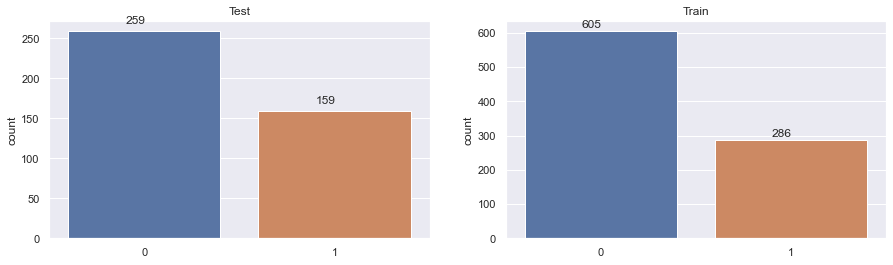

In [134]:
#Survival Predictions
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Test')
ax = sns.countplot(x=rfc_test_pred2)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.subplot(1,2,2)
plt.title('Train')
bx = sns.countplot(x=rfc_train_pred2)
for p in bx.patches:
    bx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

#Turn Predictions into a DataFrame
rfc_test_pred2 = pd.DataFrame(rfc_test_pred2)

#Turn Test_Predictions into a DataFrame
Test_Predictions2 = pd.DataFrame(Test_Predictions)

#Set the rfc_test_pred predictions as the Second columns of Test_Predictions
Test_Predictions2['Survived'] = rfc_test_pred2

#Send the DataFrame to a .csv file without index values for proper formatting
Test_Predictions2.to_csv('Test_Predictions2.csv', index=False)

In [135]:
X.columns.values.tolist()

['Pclass',
 'SibSp',
 'Parch',
 'Cabin_data',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S',
 'Age']

In [136]:
X2 = X.drop(columns = ['SibSp', 'Parch', 'Cabin_data','Embarked_Q','Embarked_S','Age'])

data_testX2 = data_testX.drop(columns = ['SibSp','Parch','Cabin_data','Embarked_Q','Embarked_S','Age'])

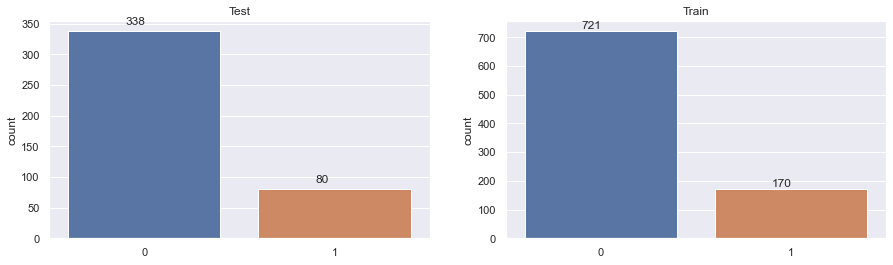

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       549
           1       0.95      0.47      0.63       342

    accuracy                           0.79       891
   macro avg       0.85      0.73      0.74       891
weighted avg       0.82      0.79      0.77       891



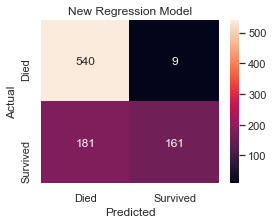

In [137]:
#Redefine the best model parameters output previously
rfc_final = RandomForestClassifier(
    n_estimators=200,
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None, 
    
    random_state=6,
    
    #random state 6, best thus far, .77272
    #best model was .775...random state = 6 and...
#     X2 = X.drop(columns = ['SibSp', 'Parch', 'Cabin_data','Embarked_Q','Embarked_S','Age'])

#     data_testX2 = data_testX.drop(columns = ['SibSp','Parch','Cabin_data','Embarked_Q','Embarked_S','Age'])
    
    verbose=0, 
    warm_start=False, 
    class_weight=None, 
    ccp_alpha=0.0, 
    max_samples=None,
    criterion='gini',
    max_depth=15,
    max_leaf_nodes=85,
    min_impurity_split=None,
    min_samples_leaf=7,
    min_samples_split=2)

#Fit to the training data set
rfc_final.fit(X2, ytrain3)

#Predict the train data from the fitted model
rfc_train_pred2 = rfc_final.predict(X2)

#Predict the test data from the fitted model
rfc_test_pred2 = rfc_final.predict(data_testX2)

#Survival Predictions 2
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Test')
ax = sns.countplot(x=rfc_test_pred2)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.subplot(1,2,2)
plt.title('Train')
bx = sns.countplot(x=rfc_train_pred2)
for p in bx.patches:
    bx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

plt.figure(figsize=(4,3))
print(classification_report(ytrain3, rfc_train_pred2))
matrix = confusion_matrix(ytrain3, rfc_train_pred2)
sns.heatmap(matrix, annot=True,  fmt='.0f', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('New Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

# ***************** DATA to CSV ********************

#Turn Predictions into a DataFrame
rfc_test_pred2 = pd.DataFrame(rfc_test_pred2)

#Turn Test_Predictions into a DataFrame
Test_Predictions2 = pd.DataFrame(Test_Predictions)

#Set the rfc_test_pred predictions as the Second columns of Test_Predictions
Test_Predictions2['Survived'] = rfc_test_pred2

#Send the DataFrame to a .csv file without index values for proper formatting
Test_Predictions2.to_csv('Test_Predictions2.csv', index=False)